<a href="https://colab.research.google.com/github/polarabbit/booksbot/blob/master/vix_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install backtesting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader as pdr
import pandas_datareader.data as web
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from scipy.stats import skew
from scipy.stats import kurtosis
import datetime
from sklearn import linear_model
import math
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from numpy import asarray
from scipy.stats import pearsonr
import seaborn as sns
from datetime import date, timedelta, datetime
from dateutil import parser
from matplotlib import pyplot as plt
from sklearn.tree import export_text
from sklearn import tree, datasets
import jinja2
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, accuracy_score, confusion_matrix
from backtesting import Backtest, Strategy
from backtesting.lib import crossover


/usr/local/lib/python3.7/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


In [4]:
vix_futures_csv = 'https://raw.githubusercontent.com/ayoubbensakhria/wqu690/master/data/vix_futures.csv'
vix_futures = pd.read_csv(vix_futures_csv, parse_dates=True)

In [5]:
vix_futures.index = pd.to_datetime(vix_futures['Date']).dt.date

In [6]:
vix_df=vix_futures.drop(columns=['Date','VXX']).iloc[:,0:5]

In [7]:
vix_df=vix_df[::-1]

In [8]:
vix_df.index=pd.to_datetime(vix_df.index)

In [9]:
download = "^GSPC ^IXIC ^VIX"
df = yf.download(download, start = "2006-01-01", end = "2022-12-31")["Adj Close"]
df1 = yf.download("^GSPC ^IXIC ^VIX VXX VXZ", start = "2018-01-26", end = "2022-10-15")["Adj Close"]

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  5 of 5 completed


In [10]:
# quick decriptive statistics 
def descriptiveStatistics(df):
  dfstats = vix_df.describe()
  dfstats.loc['variance'] = df.var().tolist()
  dfstats.loc['skewness'] = df.skew().tolist()
  dfstats.loc['kurtosis'] = df.kurtosis().tolist()

  # formatting the values
  dfstats.loc['count'] = dfstats.loc['count'].astype(int).astype(str)
  dfstats.iloc[1:] = dfstats.iloc[1:].applymap('{:.4f}'.format)

  return dfstats

In [11]:
descriptiveStatistics(vix_df)

,VIX,M1,M2,VIX3M,SPX
count,1540,1540,1540,1540,1540
mean,18.1659,18.8232,19.8007,20.2337,3043.1163
std,8.2956,7.2181,6.5318,7.3471,756.4718
min,9.1100,9.8800,11.3000,11.9200,1978.3500
25%,12.7375,14.1000,15.3175,15.2200,2472.4450
50%,16.0100,16.8000,17.6650,17.8800,2838.3350
75%,21.2325,21.4100,22.6625,23.2050,3401.0275
max,82.6900,72.6000,60.7500,72.9800,4796.5601
variance,68.8168,52.1013,42.6650,53.9803,572249.5542
skewness,2.7320,2.3020,1.6666,2.1056,0.7841


In [12]:
df1["diff"]=df1["VXZ"]-df1["VXX"]

In [13]:
df1.describe()

,VXX,VXZ,^GSPC,^IXIC,^VIX,diff
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,86.477051,24.818538,3439.851950,10459.864385,21.357721,-61.658512
std,53.161156,5.881459,676.877955,2850.211994,8.559735,54.959005
min,17.629999,16.440001,2237.399902,6192.919922,10.850000,-237.459999
25%,28.860001,18.940001,2843.489990,7837.129883,15.600000,-104.644997
50%,88.800003,25.719999,3239.909912,9750.969727,19.510000,-64.810001
75%,125.720001,29.629999,4110.410156,13129.959961,25.350000,-2.160000
max,276.000000,38.540001,4796.560059,16057.440430,82.690002,9.890001


Text(0.5, 1.0, '^GSPC S&P500')

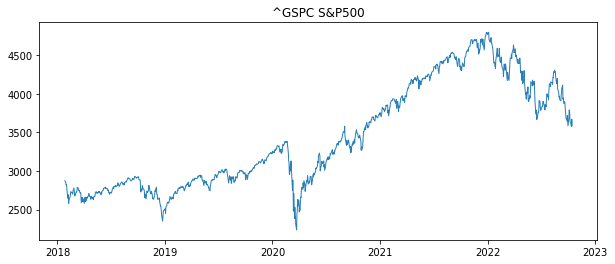

In [14]:
plt.figure(figsize =(10,4))
plt.plot(df1['^GSPC'], color = '#2980B9', linewidth = 1, label = 'S&P500')
plt.title("^GSPC S&P500")

Text(0.5, 1.0, '^VIX')

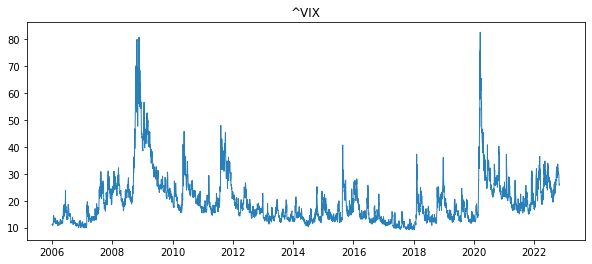

In [15]:
plt.figure(figsize =(10,4))
plt.plot(df['^VIX'], color = '#2980B9', linewidth = 1, label = 'S&P500')
plt.title("^VIX")

Text(0.5, 1.0, 'VIX ')

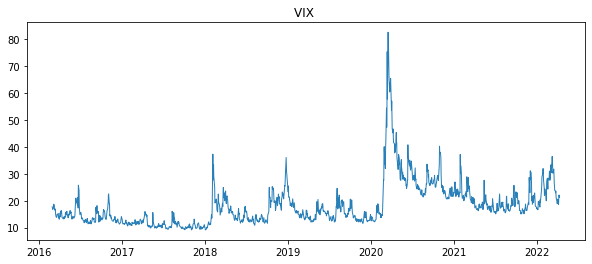

In [16]:
plt.figure(figsize =(10,4))
plt.plot(vix_df['VIX'], color = '#2980B9', linewidth = 1, label = 'VIX ')
plt.title("VIX ")

Text(0.5, 1.0, 'VIX Future M1')

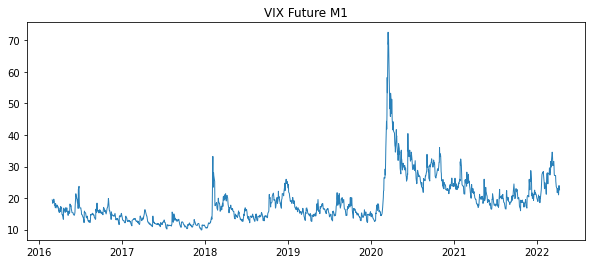

In [17]:
plt.figure(figsize =(10,4))
plt.plot(vix_df['M1'], color = '#2980B9', linewidth = 1, label = 'VIX Future M1')
plt.title("VIX Future M1")

Text(0.5, 1.0, 'VIX - M2')

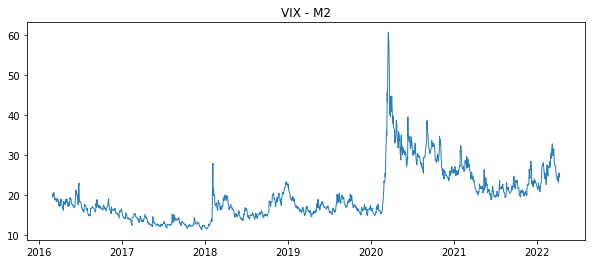

In [18]:
plt.figure(figsize =(10,4))
plt.plot(vix_df['M2'], color = '#2980B9', linewidth = 1, label = 'VIX - M2')
plt.title("VIX - M2")

Text(0.5, 1.0, 'VIX - M3')

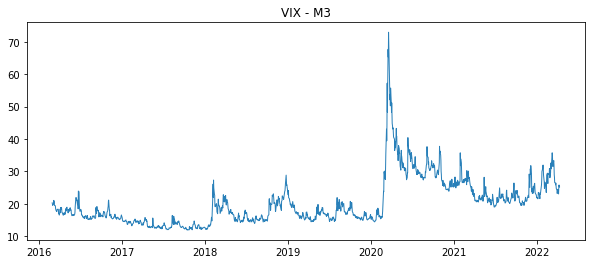

In [19]:
plt.figure(figsize =(10,4))
plt.plot(vix_df['VIX3M'], color = '#2980B9', linewidth = 1, label = 'VIX - M3')
plt.title("VIX - M3")

# Combined plot for "VIX, VIX Future and 'VIX - M2'"

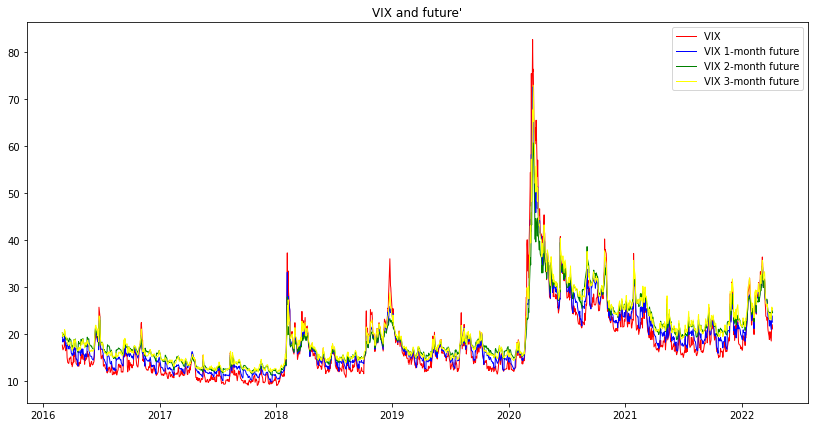

In [20]:
plt.figure(figsize =(14,7))
plt.plot(vix_df['VIX'], color = 'red', linewidth = 1, label = 'VIX ')
plt.plot(vix_df['M1'], color = 'blue', linewidth = 1, label = 'VIX 1-month future')
plt.plot(vix_df['M2'], color = 'green', linewidth = 1, label = 'VIX 2-month future')
plt.plot(vix_df['VIX3M'], color = 'yellow', linewidth = 1, label = 'VIX 3-month future')
plt.title("VIX and future'")
plt.legend()

In [21]:
vix_df

,VIX,M1,M2,VIX3M,SPX
Date,,,,,
2016-03-01,17.70,19.40,20.30,20.28,1978.3500
2016-03-02,17.09,19.30,20.25,19.92,1986.4500
2016-03-03,16.70,18.35,19.50,19.49,1993.4000
2016-03-04,16.86,18.95,20.00,19.63,1999.9900
2016-03-07,17.35,18.60,19.80,19.90,2001.7600
...,...,...,...,...,...
2022-04-04,18.57,21.00,23.21,23.03,4582.6401
2022-04-05,21.03,22.85,24.55,24.90,4525.1201
2022-04-06,22.10,23.95,25.53,25.80,4481.1499


<AxesSubplot:xlabel='Date'>

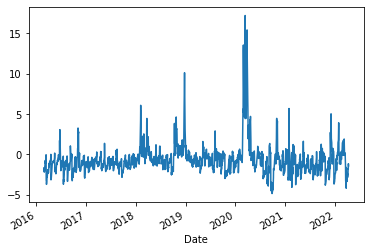

In [22]:
(vix_df["VIX"] - vix_df["M1"]).plot()

# Simple Moving avarage

In [23]:
def perform_adf_test(series):
    result=adfuller(series)
    print ('ADF stats: %f' % result[0])
    print('p-value: %f' % result[1])

In [24]:
def SMA(data,period = 30, column ='Close'):
  return data[column].rolling(window = period).mean()

In [25]:
SMA(vix_df,21,'VIX')

Date
2016-03-01          NaN
2016-03-02          NaN
2016-03-03          NaN
2016-03-04          NaN
2016-03-07          NaN
                ...    
2022-04-04    25.332381
2022-04-05    24.598095
2022-04-06    23.977619
2022-04-07    23.458571
2022-04-08    23.026667
Name: VIX, Length: 1540, dtype: float64

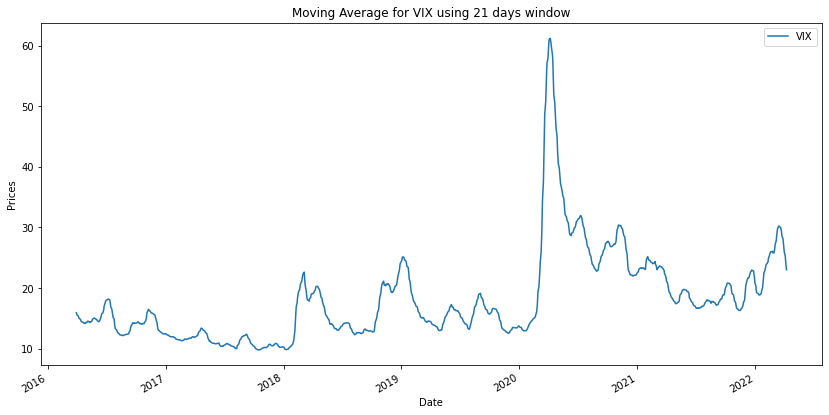

In [26]:
plt.figure(figsize =(14,7))
smadf = SMA(vix_df,21,'VIX')
smadf.plot(title ="Moving Average for VIX using 21 days window")
# plt.axhline(smadf.max(),c='red',label='Max SMA')
# plt.axhline(smadf.min(),c='green',label='Min SMA')
plt.ylabel("Prices")
plt.legend()

In [27]:
SMA(vix_df,21,'VIX').describe()

count    1520.000000
mean       18.155335
std         7.683835
min         9.800476
25%        13.037024
50%        16.266190
75%        21.005476
max        61.217143
Name: VIX, dtype: float64

In [28]:
#only VIX is stationary 
#only VIX is stationary 
#perform_adf_test(vix_df.VIX),perform_adf_test(vix_df.M1),
perform_adf_test(vix_df.M2),perform_adf_test(vix_df.VIX3M),perform_adf_test(vix_df.SPX),perform_adf_test(df1['^GSPC']),perform_adf_test(df1['^VIX']),
perform_adf_test(df1['diff'])

ADF stats: -3.042524
p-value: 0.031110
ADF stats: -2.887402
p-value: 0.046833
ADF stats: -0.331381
p-value: 0.920941
ADF stats: -1.456018
p-value: 0.555146
ADF stats: -3.841765
p-value: 0.002508
ADF stats: -1.396109
p-value: 0.584140


In [29]:
adfuller(vix_df.VIX)

(-4.0755629578384465,
 0.001062632025884834,
 9,
 1530,
 {'1%': -3.434631245212095,
  '5%': -2.8634309048528066,
  '10%': -2.5677766901619035},
 6430.891961998817)

In [30]:
vix_df

,VIX,M1,M2,VIX3M,SPX
Date,,,,,
2016-03-01,17.70,19.40,20.30,20.28,1978.3500
2016-03-02,17.09,19.30,20.25,19.92,1986.4500
2016-03-03,16.70,18.35,19.50,19.49,1993.4000
2016-03-04,16.86,18.95,20.00,19.63,1999.9900
2016-03-07,17.35,18.60,19.80,19.90,2001.7600
...,...,...,...,...,...
2022-04-04,18.57,21.00,23.21,23.03,4582.6401
2022-04-05,21.03,22.85,24.55,24.90,4525.1201
2022-04-06,22.10,23.95,25.53,25.80,4481.1499


Multiplot

/root/.local/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


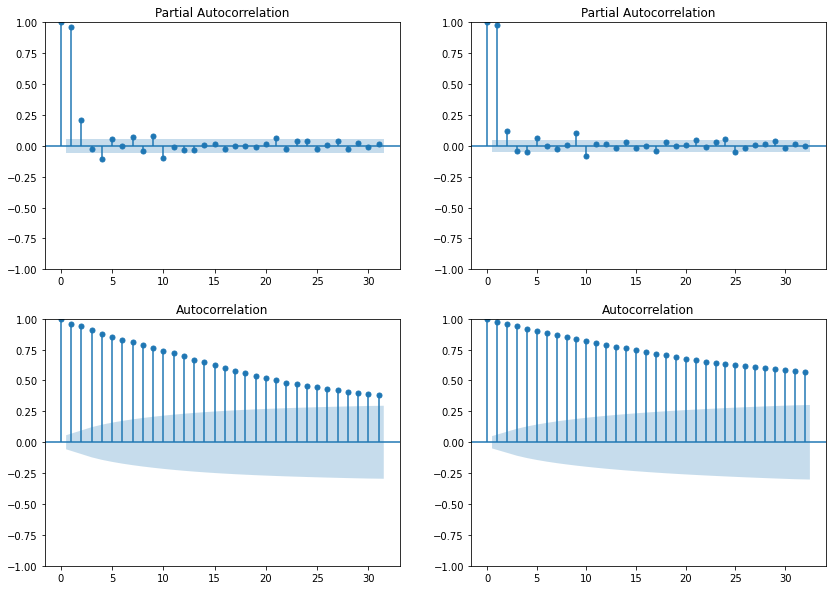

In [31]:
#fig = plt.figure(figsize =(14,10))
# fig, ax = plt.subplots(2, 2,figsize=(15,10))
#fig.suptitle('Sharing x per column, y per row')
# plot_pacf(df1['^VIX'], ax=plt.gca())

# pacf_plot=plot_acf(df1['^VIX'],ax=axs[2])
# acf_plot= plot_acf(vix_df['M1'],ax=axs[3])


plt.figure(figsize =(14,10)) 
plt.subplot(221) 
plot_pacf(df1['^VIX'], ax=plt.gca());
plt.subplot(222)
plot_pacf(vix_df['M1'], ax=plt.gca());
plt.subplot(223) 
plot_acf(df1['^VIX'],ax=plt.gca());
plt.subplot(224) 
plot_acf(vix_df['M1'],ax=plt.gca());
# plt.show()

In [32]:
# pacf_plot=plot_pacf(df1['^VIX']);

In [33]:
# pacf_plot= plot_pacf(vix_df['M1']);

In [34]:
# acf_plot= plot_acf(df1['^VIX']);

In [35]:
# acf_plot= plot_acf(vix_df['M1']);

In [36]:
#ARMA model for VIX
first_diffs_sp500=(df1['^GSPC']-df1['^GSPC'].shift(1)).dropna()

Text(0.5, 1.0, 'first_diffs_sp500')

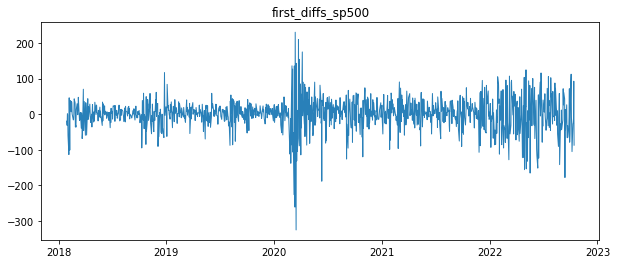

In [37]:
plt.figure(figsize =(10,4))
plt.plot(first_diffs_sp500, color = '#2980B9',linewidth = 1, label = 'first_diffs_sp500')
plt.title("first_diffs_sp500")

In [38]:
#stationary first diff sp 500
perform_adf_test(first_diffs_sp500)

ADF stats: -10.912581
p-value: 0.000000


/root/.local/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


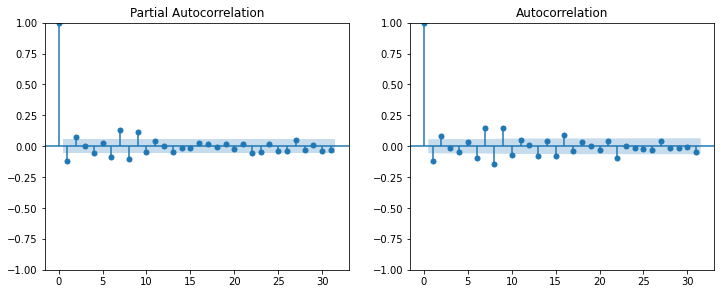

In [39]:
plt.figure(figsize =(12,10)) 
plt.subplot(221)
plot_pacf(first_diffs_sp500,ax=plt.gca());
plt.subplot(222)
plot_acf(first_diffs_sp500,ax=plt.gca());

In [40]:
#modeling SP500 first difference
#model=ARMA(first_diffs_sp500,order=(1,0,1))



In [41]:
#model_fit=model.fit()

In [42]:
#prediction_info=model_fit.forecast(21)

#predictions = prediction_info[0]
#lower_bound = prediction_info[2][:,0]
#upper_bound = prediction_info[2][:,1]

In [43]:
#predictions,lower_bound,upper_bound

In [44]:
#plt.figure(figsize=(20,10))
#plt.plot(first_diffs_sp500.reset_index().drop("Date",axis=1))
#plt.plot(np.arange(len(first_diffs_sp500)+1,len(first_diffs_sp500)+22),predictions,color='g')
#plt.fill_between(np.arange(len(first_diffs_sp500)+1,len(first_diffs_sp500)+22),lower_bound,upper_bound,color='g',alpha=0.1)

In [45]:
def undo_transformations(predictions, series):
    first_pred = series.iloc[-1]+predictions[0]
    orig_predictions =[first_pred]
    
    for i in range(len(predictions[1:])):
        next_pred = orig_predictions[-1]+predictions[i+1]
        orig_predictions.append(next_pred)
    
    return np.array(orig_predictions).flatten()

In [46]:
#orig_predictions= undo_transformations(predictions,df1['^GSPC'] )
#orig_lower_bound = undo_transformations(lower_bound, df1['^GSPC'])
#orig_upper_bound = undo_transformations(upper_bound, df1['^GSPC'])

In [47]:
#plt.figure(figsize=(20,10))
#plt.plot(df1['^GSPC'].reset_index().drop("Date",axis=1))
#plt.plot(np.arange(len(df1['^GSPC'])+1,len(df1['^GSPC'])+22),orig_predictions,color='g')
#plt.fill_between(np.arange(len(df1['^GSPC'])+1,len(df1['^GSPC'])+22),orig_lower_bound,orig_upper_bound,color='g',alpha=0.1)
#plt.title('SP500')

In [48]:
vix_df.describe()

,VIX,M1,M2,VIX3M,SPX
count,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000
mean,18.165883,18.823198,19.800684,20.233727,3043.116297
std,8.295589,7.218123,6.531843,7.347128,756.471780
min,9.110000,9.880000,11.300000,11.920000,1978.350000
25%,12.737500,14.100000,15.317500,15.220000,2472.445000
50%,16.010000,16.800000,17.665000,17.880000,2838.335000
75%,21.232500,21.410000,22.662500,23.205000,3401.027500
max,82.690000,72.600000,60.750000,72.980000,4796.560100


In [49]:
vix_df['after_1m'] = vix_df['SPX'].shift(-21)
vix_df['after_1w'] = vix_df['SPX'].shift(-5)

In [50]:
vix_df['rolling 1m return'] = (vix_df['after_1m']-vix_df['SPX'])/vix_df['SPX'] 
vix_df['rolling 1w return'] = (vix_df['after_1w']-vix_df['SPX'])/vix_df['SPX'] 

In [51]:
vix_df

,VIX,M1,M2,VIX3M,SPX,after_1m,after_1w,rolling 1m return,rolling 1w return
Date,,,,,,,,,
2016-03-01,17.70,19.40,20.30,20.28,1978.3500,2059.74,1979.26,0.041140,0.000460
2016-03-02,17.09,19.30,20.25,19.92,1986.4500,2072.78,1989.26,0.043459,0.001415
2016-03-03,16.70,18.35,19.50,19.49,1993.4000,2066.13,1989.57,0.036485,-0.001921
2016-03-04,16.86,18.95,20.00,19.63,1999.9900,2045.17,2022.19,0.022590,0.011100
2016-03-07,17.35,18.60,19.80,19.90,2001.7600,2066.66,2019.64,0.032421,0.008932
...,...,...,...,...,...,...,...,...,...
2022-04-04,18.57,21.00,23.21,23.03,4582.6401,NaN,NaN,NaN,NaN
2022-04-05,21.03,22.85,24.55,24.90,4525.1201,NaN,NaN,NaN,NaN
2022-04-06,22.10,23.95,25.53,25.80,4481.1499,NaN,NaN,NaN,NaN


In [52]:
vix_df['rolling 1m return'].describe(),vix_df['rolling 1w return'].describe()

(count    1519.000000
 mean        0.012106
 std         0.045058
 min        -0.329668
 25%        -0.004360
 50%         0.017670
 75%         0.034303
 max         0.251144
 Name: rolling 1m return, dtype: float64, count    1535.000000
 mean        0.002935
 std         0.022867
 min        -0.179666
 25%        -0.005569
 50%         0.004536
 75%         0.014059
 max         0.173974
 Name: rolling 1w return, dtype: float64)

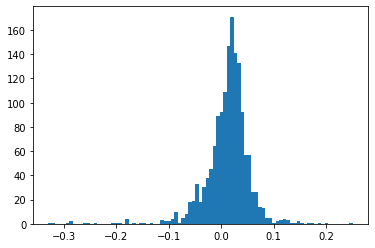

In [53]:
plt.hist(vix_df['rolling 1m return'], bins='auto')  # arguments are passed to np.histogram
plt.show()

In [54]:
skew(vix_df['rolling 1m return'].dropna(), axis=0, bias=True),kurtosis(vix_df['rolling 1m return'].dropna(), axis=0, bias=True),skew(vix_df['rolling 1w return'].dropna(), axis=0, bias=True),kurtosis(vix_df['rolling 1w return'].dropna(), axis=0, bias=True)

(-1.859928220326088,
 12.279282722779598,
 -0.9843621181296841,
 10.949594436085409)

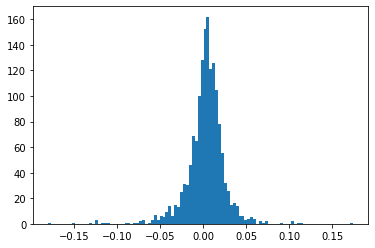

In [55]:
plt.hist(vix_df['rolling 1w return'], bins='auto')  # arguments are passed to np.histogram
plt.show()

In [56]:
perform_adf_test(vix_df['rolling 1w return'].dropna()),perform_adf_test(vix_df['rolling 1m return'].dropna())

ADF stats: -8.786121
p-value: 0.000000
ADF stats: -5.550460
p-value: 0.000002


(None, None)

In [57]:
vix_df["c0"]=vix_df["M1"]/vix_df["VIX"]-1
vix_df["c1"]=vix_df["M2"]/vix_df["M1"]-1
vix_df["c2"]=vix_df["VIX3M"]/vix_df["M2"]-1
vix_df["SP500 return"]=np.log(vix_df['SPX'])-np.log(vix_df['SPX']).shift(1)

In [58]:
vix_df
4488.2798/1978.3500

2.2686985619329243

In [59]:
# np.cumprod(1 + vix_df['log_returns'].dropna().values) - 1

In [60]:
rho = vix_df.corr()
pval = vix_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(4).astype(str) + p

,VIX,M1,M2,VIX3M,SPX,after_1m,after_1w,rolling 1m return,rolling 1w return,c0,c1,c2,SP500 return
VIX,1.0,0.9789,0.9304,0.9699,0.2532,0.297,0.2602,0.3134,0.0919,-0.5934,-0.6102,0.5787,-0.1614
M1,0.9789,1.0,0.9773,0.9891,0.318,0.3589,0.3255,0.3239,0.1054,-0.451,-0.545,0.4467,-0.1213
M2,0.9304,0.9773,1.0,0.9865,0.4054,0.4454,0.4135,0.3135,0.1184,-0.3695,-0.3829,0.3351,-0.0864
VIX3M,0.9699,0.9891,0.9865,1.0,0.3639,0.4066,0.3722,0.3217,0.1193,-0.4677,-0.4608,0.4717,-0.1134
SPX,0.2532,0.318,0.4054,0.3639,1.0,0.9817,0.9955,-0.0825,-0.0405,-0.0386,0.0695,0.0321,0.0238
after_1m,0.297,0.3589,0.4454,0.4066,0.9817,1.0,0.9856,0.1056,0.0354,-0.0698,0.0595,0.0549,0.0137
after_1w,0.2602,0.3255,0.4135,0.3722,0.9955,0.9856,1.0,-0.0379,0.0522,-0.0425,0.0665,0.0347,0.0221
rolling 1m return,0.3134,0.3239,0.3135,0.3217,-0.0825,0.1056,-0.0379,1.0,0.48,-0.0998,-0.123,0.1094,-0.0439
rolling 1w return,0.0919,0.1054,0.1184,0.1193,-0.0405,0.0354,0.0522,0.48,1.0,-0.0237,-0.0234,0.0315,-0.0413
c0,-0.5934,-0.451,-0.3695,-0.4677,-0.0386,-0.0698,-0.0425,-0.0998,-0.0237,1.0,0.5629,-0.822,0.2071


In [61]:

before_2020=vix_df[:'2020-1-1']
after_2020=vix_df['2020-1-1':]

In [62]:
before_2020.describe()

,VIX,M1,M2,VIX3M,SPX,after_1m,after_1w,rolling 1m return,rolling 1w return,c0,c1,c2,SP500 return
count,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,966.000000
mean,14.399928,15.157844,16.063922,16.244488,2576.528262,2603.848872,2583.011468,0.011027,0.002662,0.068682,0.069114,0.010173,0.000508
std,3.828107,2.994033,2.420384,2.736205,313.400672,318.515577,314.210290,0.030171,0.016349,0.081336,0.064977,0.046361,0.007802
min,9.110000,9.880000,11.300000,11.920000,1978.350000,2000.540000,1979.260000,-0.113135,-0.085394,-0.280566,-0.248619,-0.189624,-0.041843
25%,11.805000,12.900000,14.255000,14.520000,2328.600000,2357.095000,2343.085000,-0.004317,-0.004130,0.016890,0.028723,-0.018358,-0.002253
50%,13.430000,14.800000,16.210000,15.830000,2636.780000,2651.070000,2639.440000,0.015382,0.003874,0.069246,0.073002,0.006936,0.000618
75%,16.020000,16.720000,17.600000,17.740000,2824.020000,2845.405000,2832.755000,0.030616,0.012052,0.122218,0.112475,0.033596,0.004445
max,37.320000,33.200000,27.950000,28.840000,3240.020000,3329.620100,3257.850100,0.133410,0.067598,0.315208,0.282787,0.265278,0.048403


In [63]:
after_2020.describe()

,VIX,M1,M2,VIX3M,SPX,after_1m,after_1w,rolling 1m return,rolling 1w return,c0,c1,c2,SP500 return
count,573.000000,573.000000,573.000000,573.000000,573.000000,552.000000,568.000000,552.000000,568.000000,573.000000,573.000000,573.000000,573.000000
mean,24.521344,25.008883,26.106876,26.966003,3830.534501,3851.547118,3835.681442,0.013997,0.003398,0.041767,0.061374,0.026688,0.000574
std,9.796349,8.000050,6.438604,7.764469,620.195796,622.250809,620.477899,0.063180,0.030966,0.083181,0.073829,0.054719,0.016146
min,12.100000,12.550000,14.940000,14.410000,2237.399900,2237.399900,2237.399900,-0.329668,-0.179666,-0.338070,-0.212189,-0.074504,-0.127652
25%,18.040000,19.730000,21.650000,21.830000,3320.790000,3350.749975,3327.755000,-0.004379,-0.008472,-0.000395,0.023599,-0.009969,-0.005327
50%,22.210000,23.390000,25.210000,25.690000,3886.830100,3914.715000,3900.315100,0.022381,0.006073,0.043557,0.074232,0.017577,0.001474
75%,27.750000,28.250000,29.670000,30.270000,4395.640100,4401.512475,4398.394875,0.044737,0.018204,0.100054,0.105809,0.049269,0.008058
max,82.690000,72.600000,60.750000,72.980000,4796.560100,4796.560100,4796.560100,0.251144,0.173974,0.247256,0.230226,0.296269,0.089683


In [64]:
rho = before_2020.corr()
pval = before_2020.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(4).astype(str) + p

,VIX,M1,M2,VIX3M,SPX,after_1m,after_1w,rolling 1m return,rolling 1w return,c0,c1,c2,SP500 return
VIX,1.0,0.9604,0.8768,0.9586,0.0685,0.1075,0.0841,0.1734,0.1268,-0.743,-0.7523,0.5356,-0.2559
M1,0.9604,1.0,0.9488,0.9652,0.0361,0.073,0.0502,0.1617,0.1139,-0.5511,-0.7283,0.3415,-0.2036
M2,0.8768,0.9488,1.0,0.9537,-0.0354,-0.0008,-0.0225,0.1452,0.1024,-0.449,-0.4895,0.153,-0.1583
VIX3M,0.9586,0.9652,0.9537,1.0,-0.0203,0.0145,-0.0065,0.1522,0.1126,-0.638,-0.6174,0.4391,-0.2021
SPX,0.0685,0.0361,-0.0354,-0.0203,1.0,0.9672,0.9904,-0.1154,-0.0735,-0.1516,-0.1962,0.0365,0.0276
after_1m,0.1075,0.073,-0.0008,0.0145,0.9672,1.0,0.9741,0.1395,0.0436,-0.1752,-0.2168,0.0459,0.0143
after_1w,0.0841,0.0502,-0.0225,-0.0065,0.9904,0.9741,1.0,-0.0513,0.0642,-0.1605,-0.2035,0.0411,0.0198
rolling 1m return,0.1734,0.1617,0.1452,0.1522,-0.1154,0.1395,-0.0513,1.0,0.461,-0.1123,-0.1088,0.0581,-0.0572
rolling 1w return,0.1268,0.1139,0.1024,0.1126,-0.0735,0.0436,0.0642,0.461,1.0,-0.0786,-0.0657,0.0475,-0.0635
c0,-0.743,-0.5511,-0.449,-0.638,-0.1516,-0.1752,-0.1605,-0.1123,-0.0786,1.0,0.5332,-0.7892,0.2527


In [65]:
rho = after_2020.corr()
pval = after_2020.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(4).astype(str) + p

,VIX,M1,M2,VIX3M,SPX,after_1m,after_1w,rolling 1m return,rolling 1w return,c0,c1,c2,SP500 return
VIX,1.0,0.9748,0.9193,0.9707,-0.6332,-0.5183,-0.6198,0.4284,0.0953,-0.6597,-0.7846,0.7153,-0.1857
M1,0.9748,1.0,0.9732,0.9875,-0.636,-0.5118,-0.6178,0.4791,0.1328,-0.5015,-0.741,0.5794,-0.153
M2,0.9193,0.9732,1.0,0.9798,-0.6227,-0.4822,-0.5977,0.5234,0.1813,-0.4104,-0.593,0.4617,-0.1252
VIX3M,0.9707,0.9875,0.9798,1.0,-0.6201,-0.4842,-0.5971,0.5042,0.1686,-0.5361,-0.6738,0.6194,-0.1533
SPX,-0.6332,-0.636,-0.6227,-0.6201,1.0,0.9417,0.9862,-0.2054,-0.095,0.4116,0.4924,-0.3136,0.0396
after_1m,-0.5183,-0.5118,-0.4822,-0.4842,0.9417,1.0,0.9542,0.1308,0.0522,0.3671,0.4748,-0.2695,0.0269
after_1w,-0.6198,-0.6178,-0.5977,-0.5971,0.9862,0.9542,1.0,-0.1277,0.0674,0.4124,0.4931,-0.311,0.0367
rolling 1m return,0.4284,0.4791,0.5234,0.5042,-0.2054,0.1308,-0.1277,1.0,0.4891,-0.0937,-0.1401,0.146,-0.0386
rolling 1w return,0.0953,0.1328,0.1813,0.1686,-0.095,0.0522,0.0674,0.4891,1.0,0.0267,0.0102,0.017,-0.0318
c0,-0.6597,-0.5015,-0.4104,-0.5361,0.4116,0.3671,0.4124,-0.0937,0.0267,1.0,0.606,-0.8619,0.1996


In [66]:
#label buy and sell signals
#1 buy, 0 hold, -1 sell, threshold +-1%
signal = []
for row in vix_df['rolling 1m return']:
    if row < -0.03 :    signal.append(-1)  
    elif row< 0.03: signal.append(0)
    else:           signal.append(1)

vix_df["signal"]=signal

In [67]:
#label buy and sell signals
#1 buy, 0 hold, -1 sell, threshold +-1%
signal_weekly = []
for row in vix_df['rolling 1w return']:
    if row < -0.03 :    signal_weekly.append(-1)  
    elif row< 0.03: signal_weekly.append(0)
    else:           signal_weekly.append(1)

vix_df["signal_weekly"]=signal_weekly

In [68]:
vix_df['rolling 1w return'].isna().sum(),vix_df['rolling 1m return'].isna().sum()

(5, 21)

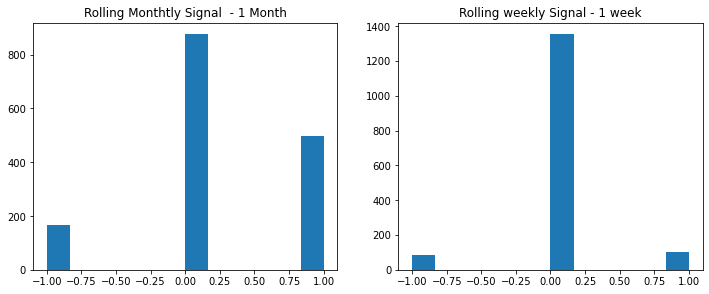

In [69]:
#plot rolling returns distribution
plt.figure(figsize =(12,10)) 
plt.subplot(221)
plt.hist(vix_df['signal'], bins='auto' )  # arguments are passed to np.histogram
plt.title("Rolling Monthtly Signal  - 1 Month")
plt.subplot(222)
plt.hist(vix_df['signal_weekly'], bins='auto')  # arguments are passed to np.histogram
plt.title("Rolling weekly Signal - 1 week")
plt.show()

In [70]:
# #plot rolling returns distribution
# plt.hist(vix_df['signal'], bins='auto')  # arguments are passed to np.histogram
# plt.show()

In [71]:
# #plot rolling returns distribution
# plt.hist(vix_df['signal_weekly'], bins='auto')  # arguments are passed to np.histogram
# plt.show()

In [72]:
percentiles = [15,20,50,80,85]
rolling_1w =vix_df['rolling 1w return'].dropna()
rolling_1m =vix_df['rolling 1m return'].dropna()

percentile_values_return =np.percentile(rolling_1w,percentiles)
percentile_values_return_1m =np.percentile(rolling_1m,percentiles)

percentile_values_return,percentile_values_return_1m

(array([-0.01314716, -0.00914277,  0.00453623,  0.01629502,  0.01934376]),
 array([-0.01948141, -0.0106913 ,  0.01767001,  0.03822989,  0.0436796 ]))

In [73]:
#contangos
contangos_c0= vix_df.loc[vix_df['c0'] >0]
contangos_c1= vix_df.loc[vix_df['c1'] >0]
contangos_c2= vix_df.loc[vix_df['c2'] >0]
#backwardation
back_c0= vix_df.loc[vix_df['c0'] <=0]
back_c1= vix_df.loc[vix_df['c1'] <=0]
back_c2= vix_df.loc[vix_df['c2'] <=0]


In [74]:
rho = contangos_c0.corr()
pval = contangos_c0.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(4).astype(str) + p

,VIX,M1,M2,VIX3M,SPX,after_1m,after_1w,rolling 1m return,rolling 1w return,c0,c1,c2,SP500 return,signal,signal_weekly
VIX,1.0,0.9862,0.9634,0.9791,0.4905,0.5037,0.492,0.181,0.0484,-0.3707,-0.381,0.234,0.0588,0.2415,0.0623
M1,0.9862,1.0,0.9851,0.9865,0.5108,0.5192,0.5127,0.1699,0.0545,-0.2205,-0.3512,0.1224,0.0672,0.2247,0.0713
M2,0.9634,0.9851,1.0,0.9929,0.5484,0.5572,0.5498,0.1548,0.0496,-0.1845,-0.1943,0.0643,0.0675,0.201,0.0739
VIX3M,0.9791,0.9865,0.9929,1.0,0.5499,0.561,0.551,0.1645,0.047,-0.2619,-0.2309,0.1779,0.0629,0.211,0.0747
SPX,0.4905,0.5108,0.5484,0.5499,1.0,0.9859,0.9974,-0.0981,-0.0586,-0.0917,0.0096,0.102,0.0435,-0.0377,-0.0081
after_1m,0.5037,0.5192,0.5572,0.561,0.9859,1.0,0.9882,0.067,-0.0083,-0.1177,0.0208,0.1154,0.0402,0.042,-0.0154
after_1w,0.492,0.5127,0.5498,0.551,0.9974,0.9882,1.0,-0.0696,0.0119,-0.0912,0.0074,0.0988,0.0497,-0.0231,0.0102
rolling 1m return,0.181,0.1699,0.1548,0.1645,-0.0981,0.067,-0.0696,1.0,0.4043,-0.0831,-0.078,0.0759,-0.0059,0.7722,0.262
rolling 1w return,0.0484,0.0545,0.0496,0.047,-0.0586,-0.0083,0.0119,0.4043,1.0,0.0065,-0.0322,-0.0121,0.0013,0.3646,0.6783
c0,-0.3707,-0.2205,-0.1845,-0.2619,-0.0917,-0.1177,-0.0912,-0.0831,0.0065,1.0,0.2305,-0.6942,0.0326,-0.1391,0.0269


In [75]:
rho = contangos_c1.corr()
pval = contangos_c1.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

,VIX,M1,M2,VIX3M,SPX,after_1m,after_1w,rolling 1m return,rolling 1w return,c0,c1,c2,SP500 return,signal,signal_weekly
VIX,1.0***,0.98***,0.963***,0.979***,0.531***,0.549***,0.538***,0.178***,0.135***,-0.42***,-0.305***,0.234***,-0.004,0.244***,0.144***
M1,0.98***,1.0***,0.988***,0.986***,0.547***,0.559***,0.554***,0.164***,0.13***,-0.243***,-0.28***,0.099***,0.025,0.22***,0.143***
M2,0.963***,0.988***,1.0***,0.992***,0.569***,0.582***,0.575***,0.156***,0.113***,-0.217***,-0.135***,0.06**,0.032,0.201***,0.132***
VIX3M,0.979***,0.986***,0.992***,1.0***,0.58***,0.595***,0.586***,0.164***,0.119***,-0.3***,-0.164***,0.178***,0.019,0.211***,0.14***
SPX,0.531***,0.547***,0.569***,0.58***,1.0***,0.985***,0.997***,-0.068**,-0.04,-0.136***,-0.01,0.154***,0.006,-0.011,0.004
after_1m,0.549***,0.559***,0.582***,0.595***,0.985***,1.0***,0.989***,0.1***,0.034,-0.169***,0.002,0.172***,-0.001,0.081***,0.024
after_1w,0.538***,0.554***,0.575***,0.586***,0.997***,0.989***,1.0***,-0.034,0.032,-0.141***,-0.016,0.156***,0.01,0.01,0.029
rolling 1m return,0.178***,0.164***,0.156***,0.164***,-0.068**,0.1***,-0.034,1.0***,0.463***,-0.089***,-0.04,0.062**,-0.007,0.77***,0.308***
rolling 1w return,0.135***,0.13***,0.113***,0.119***,-0.04,0.034,0.032,0.463***,1.0***,-0.044,-0.085***,0.034,0.001,0.412***,0.69***
c0,-0.42***,-0.243***,-0.217***,-0.3***,-0.136***,-0.169***,-0.141***,-0.089***,-0.044,1.0***,0.195***,-0.715***,0.124***,-0.165***,-0.022


In [76]:
rho = contangos_c2.corr()
pval = contangos_c2.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

,VIX,M1,M2,VIX3M,SPX,after_1m,after_1w,rolling 1m return,rolling 1w return,c0,c1,c2,SP500 return,signal,signal_weekly
VIX,1.0***,0.983***,0.942***,0.973***,0.187***,0.243***,0.196***,0.346***,0.089***,-0.617***,-0.633***,0.613***,-0.156***,0.289***,0.148***
M1,0.983***,1.0***,0.98***,0.99***,0.245***,0.304***,0.254***,0.372***,0.107***,-0.495***,-0.579***,0.494***,-0.123***,0.319***,0.164***
M2,0.942***,0.98***,1.0***,0.99***,0.347***,0.409***,0.358***,0.38***,0.134***,-0.415***,-0.434***,0.384***,-0.094***,0.34***,0.185***
VIX3M,0.973***,0.99***,0.99***,1.0***,0.303***,0.364***,0.315***,0.374***,0.128***,-0.489***,-0.491***,0.497***,-0.116***,0.315***,0.181***
SPX,0.187***,0.245***,0.347***,0.303***,1.0***,0.978***,0.994***,-0.101***,-0.046,0.02,0.16***,-0.043,0.005,-0.038,0.014
after_1m,0.243***,0.304***,0.409***,0.364***,0.978***,1.0***,0.983***,0.106***,0.034,0.006,0.151***,-0.034,-0.002,0.106***,0.055*
after_1w,0.196***,0.254***,0.358***,0.315***,0.994***,0.983***,1.0***,-0.05,0.06*,0.014,0.159***,-0.04,0.003,-0.004,0.079**
rolling 1m return,0.346***,0.372***,0.38***,0.374***,-0.101***,0.106***,-0.05,1.0***,0.485***,-0.041,-0.093***,0.052,-0.046,0.787***,0.39***
rolling 1w return,0.089***,0.107***,0.134***,0.128***,-0.046,0.034,0.06*,0.485***,1.0***,0.006,0.01,-0.007,-0.045,0.388***,0.786***
c0,-0.617***,-0.495***,-0.415***,-0.489***,0.02,0.006,0.014,-0.041,0.006,1.0***,0.619***,-0.797***,0.217***,-0.078**,-0.045


In [77]:
rho = back_c0.corr()
pval = back_c0.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

,VIX,M1,M2,VIX3M,SPX,after_1m,after_1w,rolling 1m return,rolling 1w return,c0,c1,c2,SP500 return,signal,signal_weekly
VIX,1.0***,0.983***,0.939***,0.973***,-0.032,0.073,-0.019,0.447***,0.088,-0.479***,-0.58***,0.552***,-0.111*,0.282***,0.139**
M1,0.983***,1.0***,0.977***,0.988***,0.018,0.133**,0.036,0.488***,0.119**,-0.324***,-0.519***,0.437***,-0.09,0.332***,0.169***
M2,0.939***,0.977***,1.0***,0.986***,0.13**,0.249***,0.154***,0.51***,0.166***,-0.218***,-0.344***,0.316***,-0.066,0.375***,0.205***
VIX3M,0.973***,0.988***,0.986***,1.0***,0.079,0.193***,0.101*,0.496***,0.158***,-0.327***,-0.43***,0.458***,-0.077,0.336***,0.195***
SPX,-0.032,0.018,0.13**,0.079,1.0***,0.963***,0.986***,-0.068,-0.023,0.231***,0.359***,-0.176***,0.026,0.067,0.001
after_1m,0.073,0.133**,0.249***,0.193***,0.963***,1.0***,0.974***,0.2***,0.115**,0.241***,0.333***,-0.17***,0.02,0.28***,0.115**
after_1w,-0.019,0.036,0.154***,0.101*,0.986***,0.974***,1.0***,0.024,0.139**,0.238***,0.365***,-0.175***,0.018,0.136**,0.137**
rolling 1m return,0.447***,0.488***,0.51***,0.496***,-0.068,0.2***,0.024,1.0***,0.563***,0.035,-0.097*,0.05,-0.036,0.808***,0.467***
rolling 1w return,0.088,0.119**,0.166***,0.158***,-0.023,0.115**,0.139**,0.563***,1.0***,0.06,0.055,0.001,-0.044,0.433***,0.819***
c0,-0.479***,-0.324***,-0.218***,-0.327***,0.231***,0.241***,0.238***,0.035,0.06,1.0***,0.586***,-0.795***,0.14**,0.103*,0.027


In [78]:
rho = back_c1.corr()
pval = back_c1.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

,VIX,M1,M2,VIX3M,SPX,after_1m,after_1w,rolling 1m return,rolling 1w return,c0,c1,c2,SP500 return,signal,signal_weekly
VIX,1.0***,0.979***,0.949***,0.977***,0.039,0.176***,0.049,0.483***,0.067,-0.443***,-0.595***,0.54***,-0.12*,0.34***,0.106
M1,0.979***,1.0***,0.987***,0.99***,0.088,0.239***,0.102,0.536***,0.09,-0.268***,-0.519***,0.405***,-0.091,0.407***,0.129**
M2,0.949***,0.987***,1.0***,0.988***,0.159**,0.312***,0.181***,0.555***,0.134**,-0.202***,-0.387***,0.329***,-0.076,0.442***,0.165**
VIX3M,0.977***,0.99***,0.988***,1.0***,0.115*,0.264***,0.137**,0.537***,0.132**,-0.303***,-0.462***,0.46***,-0.086,0.4***,0.16**
SPX,0.039,0.088,0.159**,0.115*,1.0***,0.945***,0.978***,-0.129**,-0.061,0.12*,0.261***,-0.109*,0.03,0.026,-0.004
after_1m,0.176***,0.239***,0.312***,0.264***,0.945***,1.0***,0.957***,0.199***,0.061,0.142**,0.209***,-0.101,0.016,0.272***,0.09
after_1w,0.049,0.102,0.181***,0.137**,0.978***,0.957***,1.0***,-0.02,0.147**,0.127*,0.287***,-0.107,0.015,0.102,0.171***
rolling 1m return,0.483***,0.536***,0.555***,0.537***,-0.129**,0.199***,-0.02,1.0***,0.528***,0.093,-0.136**,0.034,-0.043,0.821***,0.448***
rolling 1w return,0.067,0.09,0.134**,0.132**,-0.061,0.061,0.147**,0.528***,1.0***,0.036,0.125*,0.017,-0.065,0.379***,0.828***
c0,-0.443***,-0.268***,-0.202***,-0.303***,0.12*,0.142**,0.127*,0.093,0.036,1.0***,0.508***,-0.792***,0.175***,0.15**,0.005


In [79]:
rho = back_c2.corr()
pval = back_c2.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

,VIX,M1,M2,VIX3M,SPX,after_1m,after_1w,rolling 1m return,rolling 1w return,c0,c1,c2,SP500 return,signal,signal_weekly
VIX,1.0***,0.98***,0.967***,0.969***,0.53***,0.52***,0.532***,0.069*,0.041,-0.343***,-0.17***,0.09**,-0.023,0.085**,0.006
M1,0.98***,1.0***,0.987***,0.984***,0.556***,0.54***,0.559***,0.054,0.05,-0.163***,-0.18***,0.026,0.015,0.078*,0.027
M2,0.967***,0.987***,1.0***,0.996***,0.555***,0.539***,0.556***,0.035,0.029,-0.167***,-0.027,0.014,0.033,0.054,0.011
VIX3M,0.969***,0.984***,0.996***,1.0***,0.566***,0.551***,0.567***,0.041,0.032,-0.2***,-0.037,0.097**,0.039,0.058,0.016
SPX,0.53***,0.556***,0.555***,0.566***,1.0***,0.988***,0.998***,-0.066,-0.038,-0.078*,-0.084**,0.142***,0.116***,0.013,-0.057
after_1m,0.52***,0.54***,0.539***,0.551***,0.988***,1.0***,0.99***,0.086**,0.032,-0.107***,-0.065,0.14***,0.108***,0.062,-0.039
after_1w,0.532***,0.559***,0.556***,0.567***,0.998***,0.99***,1.0***,-0.035,0.029,-0.077*,-0.091**,0.14***,0.114***,0.031,-0.029
rolling 1m return,0.069*,0.054,0.035,0.041,-0.066,0.086**,-0.035,1.0***,0.457***,-0.062,-0.084**,0.046,0.023,0.75***,0.256***
rolling 1w return,0.041,0.05,0.029,0.032,-0.038,0.032,0.029,0.457***,1.0***,0.008,-0.086**,0.022,0.011,0.351***,0.626***
c0,-0.343***,-0.163***,-0.167***,-0.2***,-0.078*,-0.107***,-0.077*,-0.062,0.008,1.0***,-0.019,-0.458***,0.102**,-0.054,0.07*


In [209]:
cont_back_df = pd.DataFrame(
    {
        "Contangoes c0":contangos_c0['signal'],
        "Contangoes c1": contangos_c1['signal'],
        "Contangoes c2": contangos_c2['signal'],
        "Backwardation b0":back_c0['signal'],
        "Backwardation b1": back_c1['signal'],
        "Backwardation b2": back_c2['signal']
    }
)

In [224]:
len(contangos_c0[contangos_c0['signal']==1])/c.shape[0],len(contangos_c0[contangos_c0['signal']==0])/c.shape[0],len(contangos_c0[contangos_c0['signal']==-1])/c.shape[0]

(0.2655086848635236, 0.6319272125723738, 0.10256410256410256)

In [229]:
len(contangos_c1[contangos_c1['signal']==1])/c1.shape[0],len(contangos_c1[contangos_c1['signal']==0])/c1.shape[0],len(contangos_c1[contangos_c1['signal']==-1])/c1.shape[0]

(0.2803738317757009, 0.6160436137071651, 0.10358255451713395)

In [230]:
len(contangos_c2[contangos_c2['signal']==1])/c2.shape[0],len(contangos_c2[contangos_c2['signal']==0])/c2.shape[0],len(contangos_c2[contangos_c2['signal']==-1])/c2.shape[0]

(0.3941684665226782, 0.49136069114470843, 0.11447084233261338)

In [228]:
len(back_c0[back_c0['signal']==1])/b.shape[0],len(back_c0[back_c0['signal']==0])/b.shape[0],len(back_c0[back_c0['signal']==-1])/b.shape[0]

(0.5016181229773463, 0.3592233009708738, 0.13915857605177995)

In [227]:
len(back_c1[back_c1['signal']==1])/b1.shape[0],len(back_c1[back_c1['signal']==0])/b1.shape[0],len(back_c1[back_c1['signal']==-1])/b1.shape[0]

(0.49572649572649574, 0.358974358974359, 0.1452991452991453)

In [226]:
len(back_c2[back_c2['signal']==1])/b2.shape[0],len(back_c2[back_c2['signal']==0])/b2.shape[0],len(back_c2[back_c2['signal']==-1])/b2.shape[0]

(0.1875, 0.7094594594594594, 0.10304054054054054)

In [212]:
c.shape,c1.shape,c2.shape,b.shape,b1.shape,b2.shape

((1209, 8), (1284, 8), (926, 8), (309, 8), (234, 8), (592, 8))

In [232]:
dist = [['c0', len(contangos_c0[contangos_c0['signal']==1])/c.shape[0],len(contangos_c0[contangos_c0['signal']==0])/c.shape[0],len(contangos_c0[contangos_c0['signal']==-1])/c.shape[0],1209], ['c1',len(contangos_c1[contangos_c1['signal']==1])/c1.shape[0],len(contangos_c1[contangos_c1['signal']==0])/c1.shape[0],len(contangos_c1[contangos_c1['signal']==-1])/c1.shape[0] ,1284], ['c2',len(contangos_c2[contangos_c2['signal']==1])/c2.shape[0],len(contangos_c2[contangos_c2['signal']==0])/c2.shape[0],len(contangos_c2[contangos_c2['signal']==-1])/c2.shape[0] ,926],['b0',len(back_c0[back_c0['signal']==1])/b.shape[0],len(back_c0[back_c0['signal']==0])/b.shape[0],len(back_c0[back_c0['signal']==-1])/b.shape[0] ,309],['b1', len(back_c1[back_c1['signal']==1])/b1.shape[0],len(back_c1[back_c1['signal']==0])/b1.shape[0],len(back_c1[back_c1['signal']==-1])/b1.shape[0],234],['b2', len(back_c2[back_c2['signal']==1])/b2.shape[0],len(back_c2[back_c2['signal']==0])/b2.shape[0],len(back_c2[back_c2['signal']==-1])/b2.shape[0],592]]
  
# Create the pandas DataFrame
dist_table = pd.DataFrame(dist, columns=['name', 'buy','hold','sell','count'])
  
# print dataframe.
dist_table


,name,buy,hold,sell,count
0,c0,0.265509,0.631927,0.102564,1209
1,c1,0.280374,0.616044,0.103583,1284
2,c2,0.394168,0.491361,0.114471,926
3,b0,0.501618,0.359223,0.139159,309
4,b1,0.495726,0.358974,0.145299,234
5,b2,0.187500,0.709459,0.103041,592


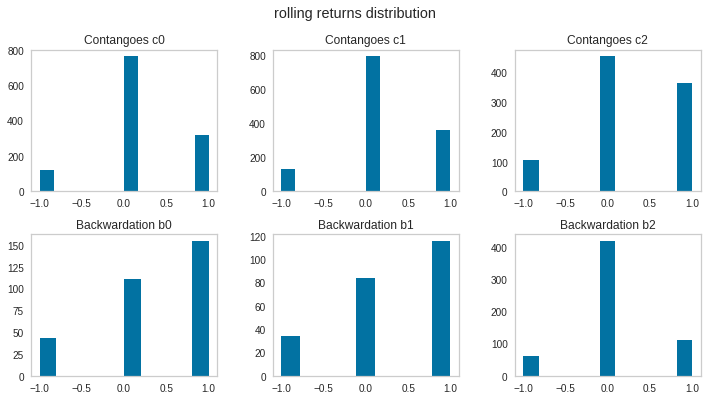

In [210]:
#plot rolling returns distribution
cont_back_df.hist(bins = "auto",layout= [2,3],figsize=(12,6), grid=False,);
plt.suptitle("rolling returns distribution")
plt.show()

In [82]:
# #plot rolling returns distribution
# plt.hist(contangos_c0['signal'], bins='auto')  # arguments are passed to np.histogram
# plt.show()

In [83]:
# #plot rolling returns distribution
# plt.hist(contangos_c1['signal'], bins='auto')  # arguments are passed to np.histogram
# plt.show()

In [84]:
# #plot rolling returns distribution
# plt.hist(contangos_c2['signal'], bins='auto')  # arguments are passed to np.histogram
# plt.show()

In [85]:
# #plot rolling returns distribution
# plt.hist(back_c0['signal'], bins='auto')  # arguments are passed to np.histogram
# plt.show()

In [86]:
# plot rolling returns distribution
# plt.hist(back_c1['signal'], bins='auto')  # arguments are passed to np.histogram
# plt.show()

In [87]:
# #plot rolling returns distribution
# plt.hist(back_c2['signal'], bins='auto')  # arguments are passed to np.histogram
# plt.show()

In [88]:
#stationary series
perform_adf_test(vix_df.c0),perform_adf_test(vix_df.c1),perform_adf_test(vix_df.c2),perform_adf_test(vix_df['rolling 1m return'].dropna())

ADF stats: -5.038803
p-value: 0.000019
ADF stats: -6.228838
p-value: 0.000000
ADF stats: -4.632420
p-value: 0.000113
ADF stats: -5.550460
p-value: 0.000002


(None, None, None, None)

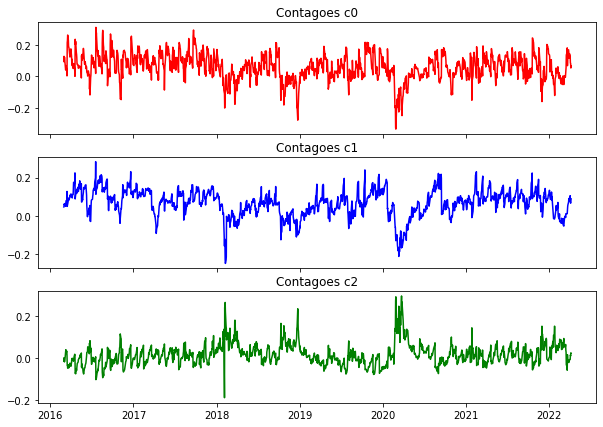

In [89]:
# plt.title("Contagoes e0,e1 and e2")
nsubplots = 3
color = ["red",'blue',"green"]
fig, ax = plt.subplots(nsubplots, sharex='col', sharey='row',figsize=(10,7))
for data, sub, cl in zip(['c0','c1','c2'],ax.ravel(), color):
  sub.plot(vix_df[data],color = cl)
  sub.set(title = 'Contagoes '+data)


In [90]:
# plt.figure(figsize=(10,4))
# plt.plot(vix_df['c0'])

In [91]:
# plt.figure(figsize=(10,4))
# plt.plot(vix_df['c1'])

In [92]:
# plt.figure(figsize=(10,4))
# plt.plot(vix_df['c2'])

In [93]:
vix_df=vix_df.dropna()

# Regression results save as image

In [94]:
def SaveRegAsImage(modelresults, showNotes = False):
  # fig = plt.figure()
  # split summary results by "Notes" and select the first value in the array, after remove the ending "\n\n" by strip()
  if showNotes == True:
    plt.text(0.01, 0.05, str(modelresults), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
  else:
    plt.text(0.01, 0.05, str(modelresults).split("Notes:")[0].strip("\n\n"), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
  plt.axis('off')
  plt.tight_layout()
  fig.set_size_inches(4,3) 
  #plt.savefig('output.png') # only regquire if you are runing this locally
  return plt.show()

# Regression Plot

In [95]:
#LR1
X = vix_df[['VIX','c0','c1','c2','SPX']]
Y = vix_df['rolling 1m return']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:      rolling 1m return   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     54.87
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           1.71e-52
Time:                        15:10:00   Log-Likelihood:                 2678.3
No. Observations:                1518   AIC:                            -5345.
Df Residuals:                    1512   BIC:                            -5313.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0105      0.006     -1.877      0.0

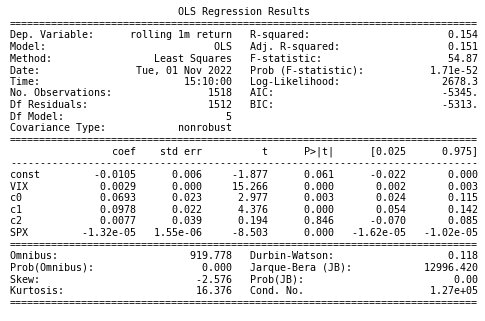

In [96]:
SaveRegAsImage(summary)

In [97]:
#linear model does not work well to predict return in 1 month
X = vix_df[['VIX','M1','M2','VIX3M','c0','c2','SPX']]
Y = vix_df['rolling 1m return']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:      rolling 1m return   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     46.30
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           1.10e-59
Time:                        15:10:00   Log-Likelihood:                 2699.4
No. Observations:                1518   AIC:                            -5383.
Df Residuals:                    1510   BIC:                            -5340.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0192      0.006      3.017      0.0

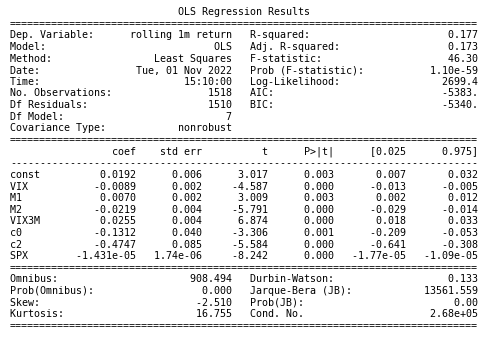

In [98]:
SaveRegAsImage(summary)

In [99]:
X = vix_df[['VIX','M1','M2','VIX3M','c0','c1','c2']]
Y = vix_df['SPX']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    SPX   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     112.3
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          1.14e-132
Time:                        15:10:01   Log-Likelihood:                -11869.
No. Observations:                1518   AIC:                         2.375e+04
Df Residuals:                    1510   BIC:                         2.380e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1735.9710     98.041     17.707      0.0

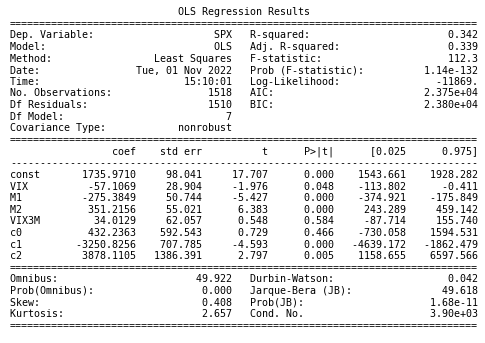

In [100]:
SaveRegAsImage(summary)

In [101]:
#'M1','M2','c1','c2' explains SPX 0.334
X = vix_df[['M1','M2','c1','c2']]
Y = vix_df['SPX']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    SPX   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     189.3
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          1.21e-131
Time:                        15:10:01   Log-Likelihood:                -11879.
No. Observations:                1518   AIC:                         2.377e+04
Df Residuals:                    1513   BIC:                         2.380e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1829.3327     62.469     29.284      0.0

In [102]:
vix_df_1=vix_df.iloc[1:]

In [103]:
vix_df_1

,VIX,M1,M2,VIX3M,SPX,after_1m,after_1w,rolling 1m return,rolling 1w return,c0,c1,c2,SP500 return,signal,signal_weekly
Date,,,,,,,,,,,,,,,
2016-03-03,16.70,18.35,19.50,19.49,1993.4000,2066.1300,1989.5700,0.036485,-0.001921,0.098802,0.062670,-0.000513,0.003493,1,0
2016-03-04,16.86,18.95,20.00,19.63,1999.9900,2045.1700,2022.1900,0.022590,0.011100,0.123962,0.055409,-0.018500,0.003300,0,0
2016-03-07,17.35,18.60,19.80,19.90,2001.7600,2066.6600,2019.6400,0.032421,0.008932,0.072046,0.064516,0.005051,0.000885,1,0
2016-03-08,18.67,19.65,20.65,21.04,1979.2600,2041.9100,2015.9300,0.031653,0.018527,0.052491,0.050891,0.018886,-0.011304,1,0
2016-03-09,18.34,19.10,20.15,20.75,1989.2600,2047.6000,2027.2200,0.029327,0.019082,0.041439,0.054974,0.029777,0.005040,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-04,31.98,32.10,30.60,32.34,4328.8701,4582.6401,4204.3101,0.058623,-0.028774,0.003752,-0.046729,0.056863,-0.007966,1,0
2022-03-07,36.45,34.55,32.69,35.74,4201.0898,4525.1201,4173.1099,0.077130,-0.006660,-0.052126,-0.053835,0.093301,-0.029963,1,0
2022-03-08,35.13,34.14,32.82,35.00,4170.7002,4481.1499,4262.4502,0.074436,0.021999,-0.028181,-0.038664,0.066423,-0.007260,1,0


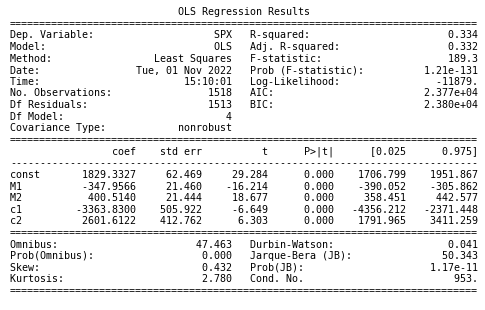

In [104]:
SaveRegAsImage(summary)

In [105]:
perform_adf_test(vix_df['VIX']),perform_adf_test(vix_df['M1']),perform_adf_test(vix_df['M2'])

ADF stats: -3.867431
p-value: 0.002288
ADF stats: -3.454985
p-value: 0.009221
ADF stats: -2.840882
p-value: 0.052667


(None, None, None)

In [106]:
#first regression to determine the spread on spot vix next time period  1
X = vix_df[['c0']][:-1]
y = vix_df['VIX'].shift(-1).dropna()
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    VIX   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     738.2
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          9.26e-133
Time:                        15:10:02   Log-Likelihood:                -5066.1
No. Observations:                1517   AIC:                         1.014e+04
Df Residuals:                    1515   BIC:                         1.015e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.4276      0.214    100.177      0.0

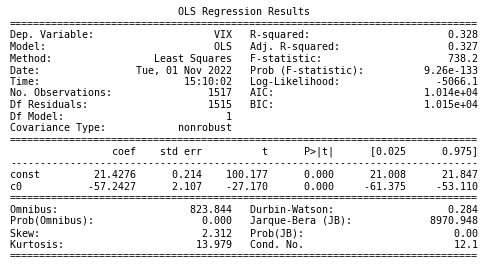

In [107]:
SaveRegAsImage(summary)

In [108]:
X = vix_df[['c0']][:-1] # 2
y = (vix_df['VIX'].shift(-1)-vix_df['VIX']).dropna()
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    VIX   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     16.38
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           5.45e-05
Time:                        15:10:03   Log-Likelihood:                -3266.5
No. Observations:                1517   AIC:                             6537.
Df Residuals:                    1515   BIC:                             6548.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1427      0.065     -2.185      0.0

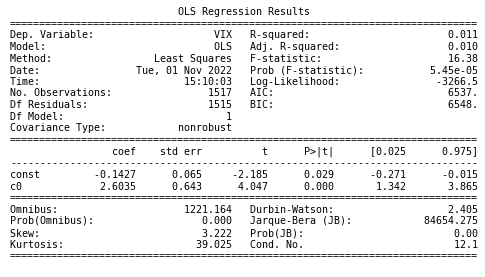

In [109]:
SaveRegAsImage(summary)

In [110]:
#regression: to determine the spread on spot vix next time period  3
spread= vix_df['M1']-vix_df['VIX']
X = spread[:-1]
y = (vix_df['VIX'].shift(-1)-vix_df['VIX']).dropna()
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    VIX   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     26.37
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           3.19e-07
Time:                        15:10:03   Log-Likelihood:                -3261.6
No. Observations:                1517   AIC:                             6527.
Df Residuals:                    1515   BIC:                             6538.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0821      0.056     -1.461      0.1

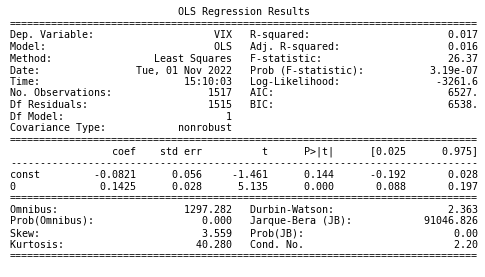

In [111]:
SaveRegAsImage(summary)

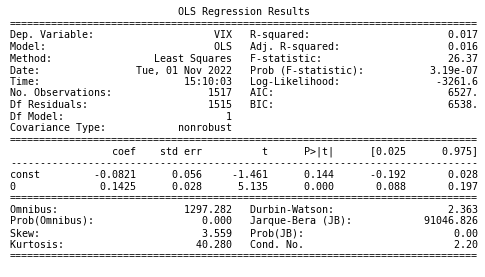

In [112]:
SaveRegAsImage(summary)

In [113]:
#regression: to determine the spread on spot vix next time period 4
spread= vix_df['M1']-vix_df['VIX']
X = spread[:-1]
y = (vix_df['M1'].shift(-1)-vix_df['M1']).dropna()
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     M1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2622
Date:                Tue, 01 Nov 2022   Prob (F-statistic):              0.609
Time:                        15:10:05   Log-Likelihood:                -2808.9
No. Observations:                1517   AIC:                             5622.
Df Residuals:                    1515   BIC:                             5632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0140      0.042      0.335      0.7

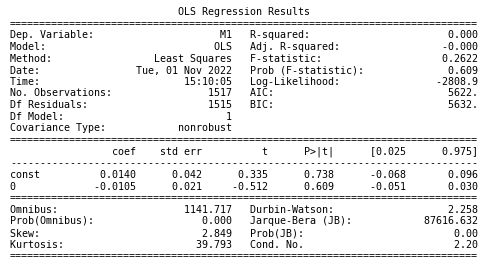

In [114]:
SaveRegAsImage(summary)

In [115]:
#regression: to determine the spread on spot vix next time period 5
spread= vix_df['M1']-vix_df['VIX']
X = spread[:-1]
y = vix_df['VIX'].shift(-1).dropna()
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    VIX   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     930.9
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          8.70e-160
Time:                        15:10:05   Log-Likelihood:                -5003.9
No. Observations:                1517   AIC:                         1.001e+04
Df Residuals:                    1515   BIC:                         1.002e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8010      0.177    111.679      0.0

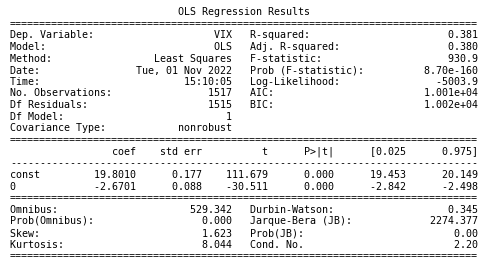

In [116]:
SaveRegAsImage(summary)

In [117]:
#regression 2 to determine the spread on future vix next time period 6
spread= vix_df['M1']-vix_df['VIX']
X = spread[:-1]
y = vix_df['M1'].shift(-1).dropna()
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     M1   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     467.1
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           1.64e-90
Time:                        15:10:06   Log-Likelihood:                -4948.2
No. Observations:                1517   AIC:                             9900.
Df Residuals:                    1515   BIC:                             9911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8971      0.171    116.421      0.0

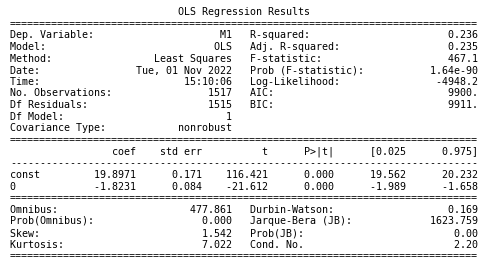

In [118]:
SaveRegAsImage(summary)

In [119]:
#plot_acf(vix_df['VIX'])

# Machine Learning and Analysis


In [120]:
X = vix_df[['VIX','c0','c1','c2']]
y = vix_df['rolling 1m return']


In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [122]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
regr = linear_model.LinearRegression()

# fit the model to the training data (learn the coefficients)
regr.fit(X_train, y_train)

LinearRegression()

In [123]:
print(regr.intercept_)
print(regr.coef_)


-0.0345939816476859
[ 0.00222544  0.04765642  0.04500179 -0.00432011]


In [124]:
X_train.shape,X_test.shape

((1138, 4), (380, 4))

In [125]:
y_pred = regr.predict(X_test)

In [126]:
from sklearn import metrics
#Mean Absolute Error (MAE) 
print(metrics.mean_absolute_error(y_test, y_pred))
#Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, y_pred))
#Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.02843685797800111
0.001982061573844393
0.04452035010918482


In [127]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:      rolling 1m return   R-squared (uncentered):                   0.139
Model:                            OLS   Adj. R-squared (uncentered):              0.136
Method:                 Least Squares   F-statistic:                              45.86
Date:                Tue, 01 Nov 2022   Prob (F-statistic):                    9.53e-36
Time:                        15:10:07   Log-Likelihood:                          1981.1
No. Observations:                1138   AIC:                                     -3954.
Df Residuals:                    1134   BIC:                                     -3934.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

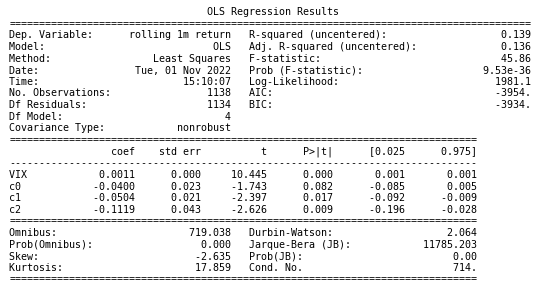

In [128]:
SaveRegAsImage(est2.summary())

In [129]:
pip install --user pycaret-ts-alpha;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
#compare models
from pycaret.classification import *
#s = setup(data=y_train, X_train, target= signal)

In [131]:
train_data_0=vix_df.sample(frac=0.9,random_state=345)
test_data_0 = vix_df.drop(train_data_0.index)
train_data=train_data_0.drop(['rolling 1m return','after_1m','rolling 1w return','after_1w','signal_weekly','SP500 return','SPX'],axis=1)
test_data=test_data_0.drop(['rolling 1m return','after_1m','rolling 1w return','after_1w','signal_weekly','SP500 return','SPX'],axis=1)
train_data.reset_index(inplace=True,drop=True)
test_data.reset_index(inplace=True,drop=True)


In [132]:
X = vix_df[['VIX','c0','c1','c2']]
y = vix_df['rolling 1m return']

In [133]:
from pycaret.classification import *

In [134]:
s=setup(data=train_data,target='signal',session_id=	345);

INFO:logs:PyCaret ClassificationExperiment
INFO:logs:Logging name: clf-default-name
INFO:logs:ML Usecase: MLUsecase.CLASSIFICATION
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: 08df
INFO:logs:self.variable_keys: {'experiment__', 'y', 'exp_id', '_all_metrics', 'X', 'seed', 'data', 'fix_imbalance_method_param', '_all_models', 'fold_generator', 'variable_keys', '_available_plots', 'log_plots_param', '_ml_usecase', 'fold_groups_param_full', 'X_train', 'imputation_regressor', 'fix_imbalance_param', 'logging_param', 'idx', 'USI', 'pipeline', '_all_models_internal', '_gpu_n_jobs_param', 'fold_groups_param', 'gpu_param', 'fold_param', 'n_jobs_param', 'y_train', 'iterative_imputation_iters_param', 'display_container', 'exp_name_log', 'X_test', 'y_test', 'memory', 'imputation_classifier', 'fold_shuffle_param', 'target_param', 'stratify_param', 'html_param', 'master_model_container'}
INFO:logs:Checking environment
INFO:logs:python_version: 3.7.15
INFO:logs:python_buil

,Description,Value
0,Session id,345
1,Target,signal
2,Target type,classification
3,Data shape,"(1366, 8)"
4,Train data shape,"(956, 8)"
5,Test data shape,"(410, 8)"
6,Numeric features,7
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


INFO:logs:setup() successfully completed in 0.71s...............


In [135]:
#compare models
model= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7018,0.8035,0.5600,0.6868,0.6847,0.4260,0.4347,0.708
et,Extra Trees Classifier,0.6946,0.8254,0.5688,0.6856,0.6806,0.4146,0.4236,0.452
rf,Random Forest Classifier,0.6841,0.8174,0.5225,0.6649,0.6614,0.3835,0.3944,0.547
gbc,Gradient Boosting Classifier,0.6695,0.7835,0.4960,0.6304,0.6384,0.3464,0.3590,1.391
ada,Ada Boost Classifier,0.6475,0.6823,0.4772,0.6089,0.6151,0.3023,0.3140,0.251
dt,Decision Tree Classifier,0.6464,0.6879,0.5595,0.6503,0.6469,0.3681,0.3690,0.061
ridge,Ridge Classifier,0.6455,0.0000,0.4276,0.5681,0.5809,0.2382,0.2768,0.045
lda,Linear Discriminant Analysis,0.6424,0.7096,0.4354,0.5868,0.5858,0.2451,0.2738,0.082
lr,Logistic Regression,0.6413,0.6986,0.4269,0.5625,0.5787,0.2331,0.2662,0.910
qda,Quadratic Discriminant Analysis,0.6370,0.6956,0.4230,0.6150,0.5663,0.2090,0.2633,0.057


INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(random_state=345)
INFO:logs:compare_models() successfully completed......................................


In [136]:
#creaete Extra Trees Classifier
et_model = create_model('et')
lightgbm_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6875,0.8060,0.5512,0.6782,0.6608,0.3782,0.4020
1,0.7396,0.8402,0.6309,0.7351,0.7360,0.5192,0.5208
2,0.7188,0.8208,0.5348,0.6841,0.6909,0.4447,0.4588
3,0.6875,0.8055,0.5435,0.6729,0.6669,0.3842,0.3983
4,0.7083,0.8272,0.5532,0.6894,0.6876,0.4340,0.4421
5,0.7083,0.7718,0.5853,0.6963,0.6945,0.4393,0.4483
6,0.6632,0.7860,0.4855,0.6293,0.6388,0.3339,0.3414
7,0.7158,0.8535,0.5881,0.7049,0.7096,0.4791,0.4799
8,0.6842,0.7398,0.5269,0.6519,0.6649,0.4094,0.4124
9,0.7053,0.7846,0.6008,0.7255,0.6966,0.4376,0.4435


INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(random_state=345)
INFO:logs:create_model() successfully completed......................................


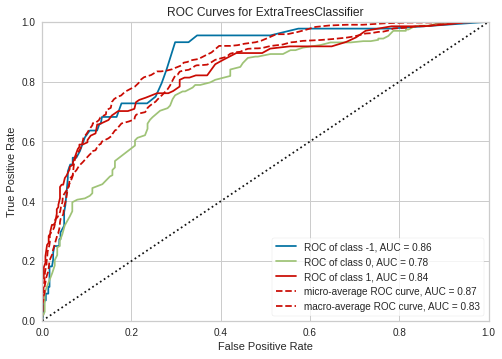

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


In [137]:
plot_model(et_model, plot='auc')

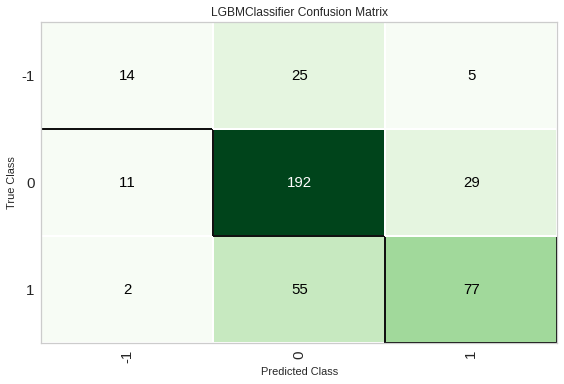

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


In [138]:
plot_model(lightgbm_model, plot='confusion_matrix')


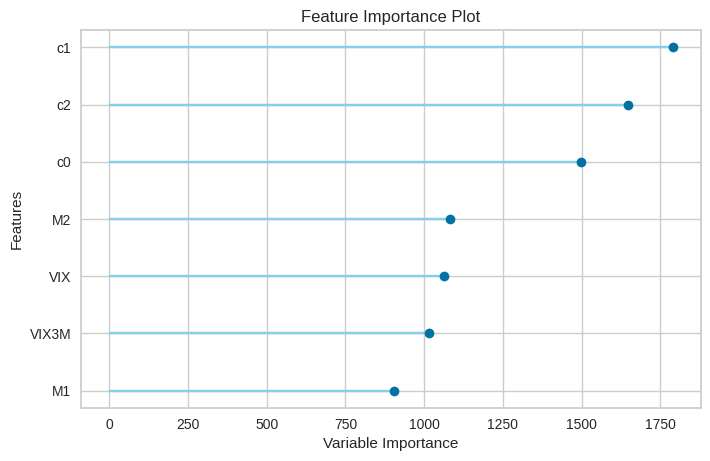

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


In [139]:
plot_model(lightgbm_model,plot='feature')

In [140]:
test_data_new_0=vix_df.drop(['rolling 1m return','after_1m','rolling 1w return','after_1w','signal_weekly','SP500 return','SPX'],axis=1)
#test_data_new=test_data_new_0.reset_index(inplace=True,drop=True)

In [141]:
test_data_new=test_data_new_0.iloc[:,0:8]

In [142]:
test_data_new.reset_index(inplace=True,drop=True)

In [143]:
predictions = predict_model(lightgbm_model, data=test_data_new)
predictions, test_data_new

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(random_state=345), probability_threshold=None, encoded_labels=False, raw_score=False, drift_report=False, round=4, verbose=True, ml_usecase=None, display=None, replace_labels_in_column=<function _SupervisedExperiment.predict_model.<locals>.replace_labels_in_column at 0x7f63c4d35cb0>, self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f63bfa14f90>)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


(        VIX     M1     M2  VIX3M        c0        c1        c2  Label   Score
 0     17.09  19.30  20.25  19.92  0.129315  0.049223 -0.016296      1  0.0757
 1     16.70  18.35  19.50  19.49  0.098802  0.062670 -0.000513      0  0.0005
 2     16.86  18.95  20.00  19.63  0.123962  0.055409 -0.018500      0  0.0065
 3     17.35  18.60  19.80  19.90  0.072046  0.064516  0.005051      1  0.1174
 4     18.67  19.65  20.65  21.04  0.052491  0.050891  0.018886      1  0.1166
 ...     ...    ...    ...    ...       ...       ...       ...    ...     ...
 1513  31.98  32.10  30.60  32.34  0.003752 -0.046729  0.056863      1  0.0749
 1514  36.45  34.55  32.69  35.74 -0.052126 -0.053835  0.093301      1  0.0578
 1515  35.13  34.14  32.82  35.00 -0.028181 -0.038664  0.066423      1  0.0114
 1516  32.45  32.00  31.38  33.06 -0.013867 -0.019375  0.053537      1  0.0323
 1517  30.23  30.30  29.93  31.52  0.002316 -0.012211  0.053124      1  0.0245
 
 [1518 rows x 9 columns],
         VIX     M1     

In [144]:
save_model(lightgbm_model,'vix_trading_signal_lightgbm')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMClassifier(random_state=345), model_name=vix_trading_signal_lightgbm, prep_pipe_=Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransfomerWrapper(include=['VIX', 'M1', 'M2', 'VIX3M', 'c0', 'c1', 'c2'], transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransfomerWrapper(include=[], transformer=SimpleImputer(fill_value='constant', strategy='constant')))]), verbose=True, use_case=MLUsecase.CLASSIFICATION, kwargs={})
INFO:logs:Adding model into prep_pipe
INFO:logs:vix_trading_signal_lightgbm.pkl saved in current working directory
INFO:logs:Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransfomerWrapper(include=['VIX', 'M1', 'M2', 'VIX3M', 'c0', 'c1', 'c2'], transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransfomerWrapper(include=[], transf

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransfomerWrapper(include=['VIX', 'M1', 'M2', 'VIX3M', 'c0', 'c1', 'c2'], transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransfomerWrapper(include=[], transformer=SimpleImputer(fill_value='constant', strategy='constant'))),
                 ['trained_model', LGBMClassifier(random_state=345)]]),
 'vix_trading_signal_lightgbm.pkl')

2. Machine learning for Regression 

In [145]:
#@title
data=vix_df.drop(columns=['after_1m','after_1w','rolling 1m return','rolling 1w return']).iloc[:,0:8]

In [146]:
#@title
dataset = data.sample(frac=0.9, random_state=786)
data_unseen = data.drop(dataset.index)

dataset.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

In [147]:
#@title
dataset

,VIX,M1,M2,VIX3M,SPX,c0,c1,c2
0,12.60,14.64,15.60,14.82,2900.4500,0.161905,0.065574,-0.050000
1,12.05,12.90,15.15,15.41,2175.4900,0.070539,0.174419,0.017162
2,24.46,26.85,29.67,29.71,3271.1201,0.097711,0.105028,0.001348
3,16.39,16.61,16.78,17.03,3273.3999,0.013423,0.010235,0.014899
4,16.41,18.35,20.56,20.32,4535.4302,0.118221,0.120436,-0.011673
...,...,...,...,...,...,...,...,...
1361,13.82,16.05,17.80,17.24,2055.0100,0.161360,0.109034,-0.031461
1362,10.26,11.25,12.47,12.47,2470.3000,0.096491,0.108444,0.000000
1363,33.46,28.05,21.60,27.33,2581.0000,-0.161686,-0.229947,0.265278
1364,10.97,12.50,13.98,14.05,2297.4200,0.139471,0.118400,0.005007


In [148]:
#@title
from pycaret.regression import *
s = setup(data = dataset, target = 'SPX', session_id=123)

INFO:logs:PyCaret RegressionExperiment
INFO:logs:Logging name: reg-default-name
INFO:logs:ML Usecase: MLUsecase.REGRESSION
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: 6078
INFO:logs:self.variable_keys: {'experiment__', 'y', 'exp_id', '_all_metrics', 'X', 'seed', 'data', '_all_models', 'fold_generator', 'variable_keys', '_available_plots', 'log_plots_param', '_ml_usecase', 'fold_groups_param_full', 'transform_target_param', 'X_train', 'imputation_regressor', 'logging_param', 'idx', 'USI', 'pipeline', '_all_models_internal', '_gpu_n_jobs_param', 'fold_groups_param', 'gpu_param', 'fold_param', 'n_jobs_param', 'y_train', 'iterative_imputation_iters_param', 'display_container', 'exp_name_log', 'X_test', 'y_test', 'memory', 'imputation_classifier', 'fold_shuffle_param', 'target_param', 'stratify_param', 'html_param', 'master_model_container', 'transform_target_method_param'}
INFO:logs:Checking environment
INFO:logs:python_version: 3.7.15
INFO:logs:python_build:

,Description,Value
0,Session id,123
1,Target,SPX
2,Target type,regression
3,Data shape,"(1366, 8)"
4,Train data shape,"(956, 8)"
5,Test data shape,"(410, 8)"
6,Numeric features,7
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


INFO:logs:setup() successfully completed in 1.01s...............


In [149]:
#@title
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,178.9399,71565.1823,265.8409,0.8724,0.0948,0.0630,0.310
rf,Random Forest Regressor,181.3729,77178.2178,276.0202,0.8622,0.0965,0.0631,0.454
knn,K Neighbors Regressor,204.9690,97499.6645,307.3314,0.8272,0.1079,0.0725,0.070
lightgbm,Light Gradient Boosting Machine,200.3194,96343.4779,306.2968,0.8267,0.1063,0.0697,0.099
gbr,Gradient Boosting Regressor,224.5264,97490.0196,310.8045,0.8257,0.1078,0.0785,0.175
dt,Decision Tree Regressor,200.5504,126079.0877,353.8901,0.7756,0.1247,0.0701,0.030
ada,AdaBoost Regressor,291.3851,131444.4571,362.0459,0.7653,0.1271,0.1040,0.130
lasso,Lasso Regression,481.5051,377824.2031,614.1688,0.3269,0.1930,0.1592,0.028
br,Bayesian Ridge,482.8782,378221.6602,614.4889,0.3260,0.1937,0.1595,0.029
ridge,Ridge Regression,483.0835,380612.8375,616.4479,0.3222,0.1937,0.1599,0.022


INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(n_jobs=-1, random_state=123)
INFO:logs:compare_models() successfully completed......................................


In [150]:
#@title
et=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,208.8252,110819.1678,332.8951,0.8066,0.1243,0.0766
1,174.0054,67667.5734,260.1299,0.8901,0.0936,0.0610
2,175.2045,68682.4267,262.0733,0.8738,0.0896,0.0607
3,184.4481,71870.0724,268.0859,0.8794,0.0887,0.0596
4,175.5140,74902.8424,273.6838,0.8699,0.0936,0.0585
5,182.7041,77175.5111,277.8048,0.8335,0.1032,0.0681
6,178.0053,58655.8505,242.1897,0.9024,0.0863,0.0629
7,192.7580,83029.8370,288.1490,0.8636,0.1038,0.0677
8,162.3086,53990.8770,232.3594,0.8841,0.0841,0.0593
9,155.6258,48857.6648,221.0377,0.9211,0.0809,0.0554


INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:ExtraTreesRegressor(n_jobs=-1, random_state=123)
INFO:logs:create_model() successfully completed......................................


In [151]:
#@title
f_et=finalize_model(tune_model(et))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,269.3198,164696.0793,405.8276,0.7126,0.1464,0.0997
1,237.8752,103100.6042,321.0928,0.8326,0.1139,0.0836
2,241.8557,108611.8131,329.5631,0.8005,0.1157,0.0867
3,242.4940,104598.5469,323.4170,0.8245,0.1038,0.0772
4,255.7521,114419.6092,338.2597,0.8013,0.1117,0.0837
5,246.5995,123737.8772,351.7640,0.7330,0.1245,0.0898
6,230.9635,90698.8299,301.1625,0.8491,0.1036,0.0808
7,243.9529,111787.8420,334.3469,0.8163,0.1145,0.0831
8,210.9939,77840.6280,278.9993,0.8329,0.1002,0.0769
9,196.8042,74556.2613,273.0499,0.8796,0.0980,0.0702


INFO:logs:master_model_container: 21
INFO:logs:display_container: 4
INFO:logs:ExtraTreesRegressor(n_jobs=-1, random_state=123)
INFO:logs:tune_model() successfully completed......................................
INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.regression.oop.RegressionExperiment object at 0x7f63c1895150>, estimator=ExtraTreesRegressor(n_jobs=-1, random_state=123), fit_kwargs=None, groups=None, model_only=True, experiment_custom_tags=None, display=None)
INFO:logs:Finalizing ExtraTreesRegressor(n_jobs=-1, random_state=123)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.regression.oop.RegressionExperiment object at 0x7f63c1895150>, estimator=ExtraTreesRegressor(n_jobs=-1, random_state=123), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display

In [152]:
#@title
unseen_predictions = predict_model(et, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesRegressor(n_jobs=-1, random_state=123), probability_threshold=None, encoded_labels=False, raw_score=False, drift_report=False, round=4, verbose=True, ml_usecase=None, display=None, replace_labels_in_column=<function _SupervisedExperiment.predict_model.<locals>.replace_labels_in_column at 0x7f63c14408c0>, self=<pycaret.regression.oop.RegressionExperiment object at 0x7f63c1895150>)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


In [153]:
#@title
from pycaret.utils import check_metric
check_metric(data_unseen.SPX, unseen_predictions.Label, 'R2')

0.9105

In [154]:
#@title
save_model(f_et,'Final ET Model 25Oct2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=ExtraTreesRegressor(n_jobs=-1, random_state=123), model_name=Final ET Model 25Oct2022, prep_pipe_=Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransfomerWrapper(include=['VIX', 'M1', 'M2', 'VIX3M', 'c0', 'c1', 'c2'], transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransfomerWrapper(include=[], transformer=SimpleImputer(fill_value='constant', strategy='constant')))]), verbose=True, use_case=MLUsecase.REGRESSION, kwargs={})
INFO:logs:Adding model into prep_pipe
INFO:logs:Final ET Model 25Oct2022.pkl saved in current working directory
INFO:logs:Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransfomerWrapper(include=['VIX', 'M1', 'M2', 'VIX3M', 'c0', 'c1', 'c2'], transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransfomerWrapper(include=[], 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransfomerWrapper(include=['VIX', 'M1', 'M2', 'VIX3M', 'c0', 'c1', 'c2'], transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransfomerWrapper(include=[], transformer=SimpleImputer(fill_value='constant', strategy='constant'))),
                 ['trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123)]]),
 'Final ET Model 25Oct2022.pkl')

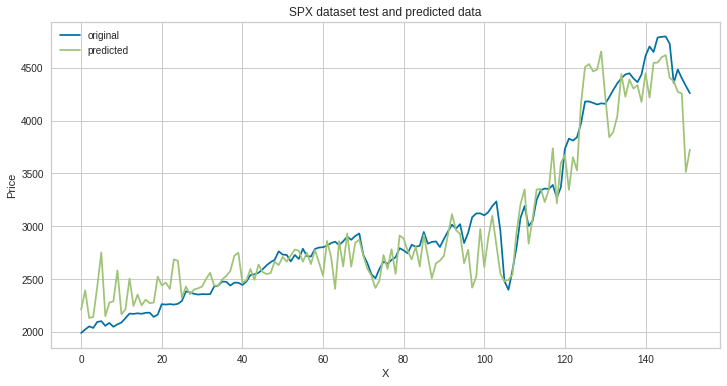

In [155]:
x_ax = range(len(data_unseen.SPX))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, data_unseen.SPX, label="original")
plt.plot(x_ax, unseen_predictions.Label, label="predicted")
plt.title("SPX dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

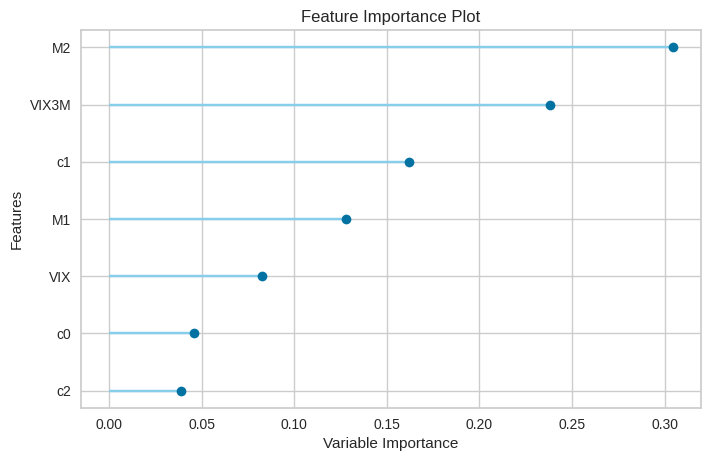

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


In [156]:
plot_model(f_et,plot='feature')

In [157]:
predictions.index=test_data_new_0.index

In [158]:
#backtesting
vix_df['buy']=np.where(vix_df.signal==1,vix_df['SPX'],np.nan)
vix_df['sell']=np.where(vix_df.signal==-1,vix_df['SPX'],np.nan)
#
predictions['buy']=np.where(predictions.Label==1,vix_df['SPX'],np.nan)
predictions['sell']=np.where(predictions.Label==-1,vix_df['SPX'],np.nan)

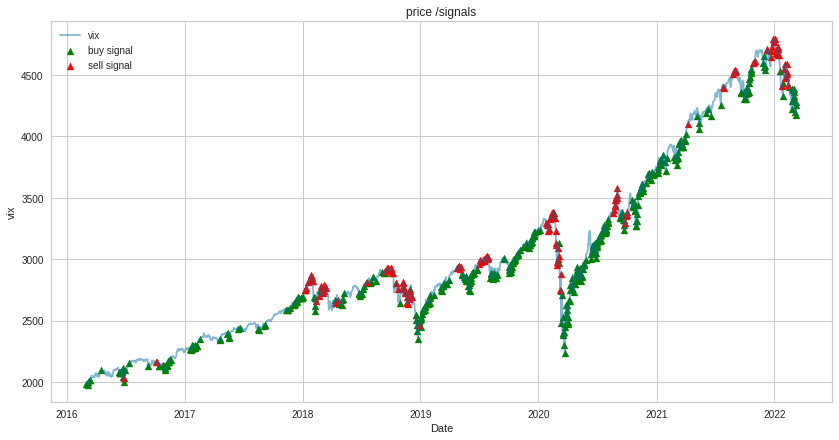

In [159]:
#
plt.figure(figsize =(14,7))
plt.title('price /signals')
plt.plot(vix_df['SPX'],alpha=0.5,label='vix')

plt.scatter(vix_df.index,predictions['buy'],color='green',label='buy signal',marker='^',alpha=1)
plt.scatter(vix_df.index,predictions['sell'],color='red',label='sell signal',marker='^',alpha=1)
plt.xlabel('Date')
plt.ylabel('vix')
plt.legend()
plt.show()



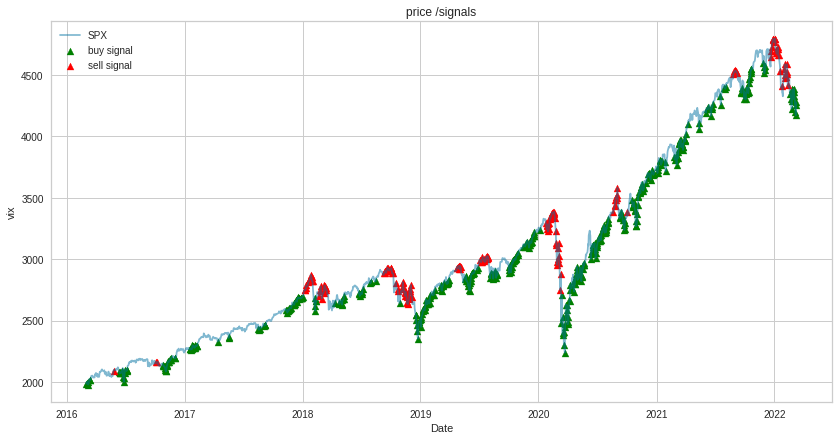

In [160]:
#
plt.figure(figsize =(14,7))
plt.title('price /signals')
plt.plot(vix_df['SPX'],alpha=0.5,label='SPX')

plt.scatter(vix_df.index,vix_df['buy'],color='green',label='buy signal',marker='^',alpha=1)
plt.scatter(vix_df.index,vix_df['sell'],color='red',label='sell signal',marker='^',alpha=1)
plt.xlabel('Date')
plt.ylabel('vix')
plt.legend()
plt.show()



In [161]:
predictions['SPX']=vix_df.SPX

In [162]:
predictions['log_returns']=np.log(predictions['SPX'])-np.log(predictions['SPX']).shift(1)

In [163]:
# original
#vix_df['strategy_returns']=vix_df.signal.shift(1)*vix_df.log_returns
#vix_df['strategy_returns']
# predictions
predictions['strategy_returns']=predictions.Label.shift(1)*predictions.log_returns
predictions['strategy_returns']

Date
2016-03-02         NaN
2016-03-03    0.003493
2016-03-04    0.000000
2016-03-07    0.000000
2016-03-08   -0.011304
                ...   
2022-03-04   -0.007966
2022-03-07   -0.029963
2022-03-08   -0.007260
2022-03-09    0.025374
2022-03-10   -0.004301
Name: strategy_returns, Length: 1518, dtype: float64

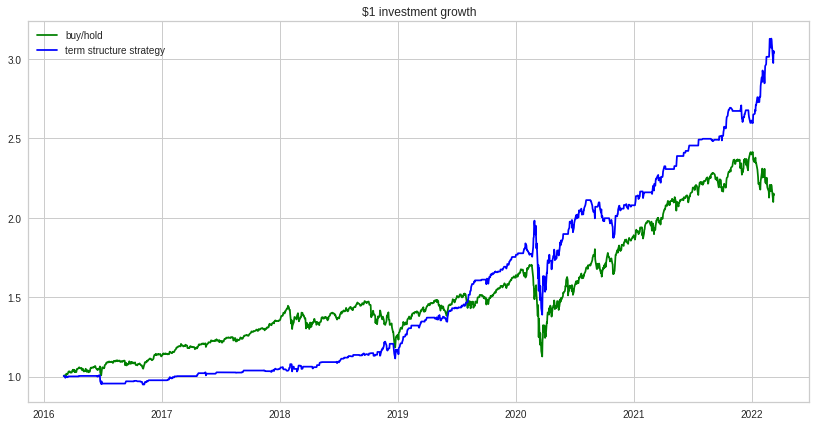

buy hold 2.1442875481386405
strategy 3.038921963205501


In [164]:
plt.figure(figsize =(14,7))
plt.title('$1 investment growth')
plt.plot(np.exp(predictions['log_returns'].dropna()).cumprod(),c='green',label='buy/hold')
plt.plot(np.exp(predictions.strategy_returns.dropna()).cumprod(),c='blue',label='term structure strategy')
plt.legend()
plt.show()
#
print('buy hold',np.exp(predictions['log_returns'].dropna()).cumprod()[-1])
print('strategy',np.exp(predictions['strategy_returns'].dropna()).cumprod()[-1])

In [165]:


# stock data retrival from yahoo finance
#def load_equities_web(symbol, date_from):
#    raw_data = web.DataReader(symbol, 'yahoo', pd.to_datetime(date_from), pd.datetime.now())
#    data = raw_data.stack(dropna=False)['Adj Close'].to_frame().reset_index().rename(columns = {'Symbols':'symbol', 'Date':'date', 'Adj Close':'value'}).sort_values(by = ['symbol', 'date'])
#    return pd.pivot_table(data, columns = 'symbol', index = 'date', values ='value')


# getting data via the function
#stock_prices = load_equities_web(['SPY', '^GSPC', '^VIX'], date_from = '2016-01-01')


def strategybacktest(prices, symbol_trade, symbol_volatility, volatility_threshold, capital, symbol_benchmark):
    
    #beging of trading day
    df_init   = (prices[symbol_trade]*0).to_frame().assign(cash = 0)
    # difference between start of trading and end of trading day
    df_update = (prices[symbol_trade]*0).to_frame().assign(cash = 0)
    # trading data at the end of the dat or possition to be hold
    df_end    = (prices[symbol_trade]*0).to_frame().assign(cash = 0)
    
    #not trading on the first day but depositing require
    df_init.iloc[0, df_init.columns.get_loc('investment')] = capital
    df_end.iloc[0, df_end.columns.get_loc('investment')]   = capital
    
    #settig time
    calendar = pd.Series(prices.index).iloc[1:]
    
    for date in calendar:
        prev_date = df_init.index[df_init.index<date][-1]
        
        df_init.loc[date, :] = df_end.loc[prev_date, :]
        
        port_value = df_init.loc[date, symbol_trade] * prices.loc[date, symbol_trade] + df_init.loc[date, 'investment']
        
        if prices.loc[date, symbol_volatility] > volatility_threshold: # volatility is high -> be fully in cash
            df_end.loc[date, symbol_trade] = 0
            df_end.loc[date, 'investment']       = port_value
        else: # volatility is low -> be in market position
            df_end.loc[date, symbol_trade] = port_value/prices.loc[date, symbol_trade]
            df_end.loc[date, 'investment'] = 0
        df_update.loc[date] = df_end.loc[date] - df_init.loc[date]
    
    portval = (df_end*prices.assign(cash = 1)[[symbol_trade, 'investment']]).sum(axis = 1).to_frame().rename(columns = {0:'strategy'})
    portval['Benchmark VIX'] = prices[symbol_benchmark]
    portval = portval/portval.iloc[0].values
    
    return portval
    
#res = strategybacktest(prices = stock_prices, symbol_trade = 'SPY', symbol_volatility = '^VIX', volatility_threshold = 40, capital = 10000, symbol_benchmark = '^GSPC')
#res[:-2].plot(title= "for Strategy Back Testing")

In [166]:
##contangos
contangos_c0= vix_df.loc[vix_df['c0'] >0]
contangos_c1= vix_df.loc[vix_df['c1'] >0]
contangos_c2= vix_df.loc[vix_df['c2'] >0]
#backwardation
back_c0= vix_df.loc[vix_df['c0'] <=0]
back_c1= vix_df.loc[vix_df['c1'] <=0]
back_c2= vix_df.loc[vix_df['c2'] <=0]

In [167]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [168]:
b=back_c0.drop(['rolling 1m return','after_1m','rolling 1w return','after_1w','signal_weekly','SP500 return','SPX'],axis=1).iloc[:,0:8]
c=contangos_c0.drop(['rolling 1m return','after_1m','rolling 1w return','after_1w','signal_weekly','SP500 return','SPX'],axis=1).iloc[:,0:8]
b1=back_c1.drop(['rolling 1m return','after_1m','rolling 1w return','after_1w','signal_weekly','SP500 return','SPX'],axis=1).iloc[:,0:8]
c1=contangos_c1.drop(['rolling 1m return','after_1m','rolling 1w return','after_1w','signal_weekly','SP500 return','SPX'],axis=1).iloc[:,0:8]
b2=back_c2.drop(['rolling 1m return','after_1m','rolling 1w return','after_1w','signal_weekly','SP500 return','SPX'],axis=1).iloc[:,0:8]
c2=contangos_c2.drop(['rolling 1m return','after_1m','rolling 1w return','after_1w','signal_weekly','SP500 return','SPX'],axis=1).iloc[:,0:8]

In [193]:
b_r=back_c0.drop(['rolling 1m return','after_1m','rolling 1w return','after_1w','signal_weekly','SP500 return'],axis=1).iloc[:,0:8]
c_r=contangos_c0.drop(['rolling 1m return','after_1m','rolling 1w return','after_1w','signal_weekly','SP500 return'],axis=1).iloc[:,0:8]
b1_r=back_c1.drop(['rolling 1m return','after_1m','rolling 1w return','after_1w','signal_weekly','SP500 return'],axis=1).iloc[:,0:8]
c1_r=contangos_c1.drop(['rolling 1m return','after_1m','rolling 1w return','after_1w','signal_weekly','SP500 return'],axis=1).iloc[:,0:8]
b2_r=back_c2.drop(['rolling 1m return','after_1m','rolling 1w return','after_1w','signal_weekly','SP500 return'],axis=1).iloc[:,0:8]
c2_r=contangos_c2.drop(['rolling 1m return','after_1m','rolling 1w return','after_1w','signal_weekly','SP500 return'],axis=1).iloc[:,0:8]

In [169]:
c.shape,c1.shape,c2.shape,b.shape,b1.shape,b2.shape

((1209, 8), (1284, 8), (926, 8), (309, 8), (234, 8), (592, 8))

In [170]:
#accuracy of backwardation 0
X = b.drop('signal', axis = 1)
y = b['signal']
y_pred_cv = cross_val_predict(lightgbm_model, X, y, cv=10)
accuracy_score(y, y_pred_cv)

0.517799352750809

In [171]:
#accuracy of backwardation 1
X = b1.drop('signal', axis = 1)
y = b1['signal']
y_pred_cv = cross_val_predict(lightgbm_model, X, y, cv=10)
accuracy_score(y, y_pred_cv)

0.5683760683760684

In [172]:
#accuracy of backwardation 2
X = b2.drop('signal', axis = 1)
y = b2['signal']
y_pred_cv = cross_val_predict(lightgbm_model, X, y, cv=10)
accuracy_score(y, y_pred_cv)

0.5405405405405406

In [173]:
#accuracy of contango 0
X = c.drop('signal', axis = 1)
y = c['signal']
y_pred_cv = cross_val_predict(lightgbm_model, X, y, cv=10)
accuracy_score(y, y_pred_cv)

0.5409429280397022

In [174]:
#accuracy of contango 1
X = c1.drop('signal', axis = 1)
y = c1['signal']
y_pred_cv = cross_val_predict(lightgbm_model, X, y, cv=10)
accuracy_score(y, y_pred_cv)

0.5046728971962616

In [175]:
#accuracy of contango 2
X = c2.drop('signal', axis = 1)
y = c2['signal']
y_pred_cv = cross_val_predict(lightgbm_model, X, y, cv=10)
accuracy_score(y, y_pred_cv)

0.5032397408207343

In [191]:
dataframe = [['c0', 0.5409429280397022,1209], ['c1', 0.5046728971962616,1284], ['c2', 0.5032397408207343,926],['b0', 0.517799352750809,309],['b1', 0.5683760683760684,234],['b2', 0.5405405405405406,592]]
  
# Create the pandas DataFrame
dataframe = pd.DataFrame(dataframe, columns=['contango name', 'accuracy','count'])
  
# print dataframe.
dataframe


,contango name,accuracy,count
0,c0,0.540943,1209
1,c1,0.504673,1284
2,c2,0.503240,926
3,b0,0.517799,309
4,b1,0.568376,234
5,b2,0.540541,592


In [198]:
#accuracy of contango 2
from sklearn.metrics import r2_score
X = c_r.drop('SPX', axis = 1)
y = c_r['SPX']
y_pred_cv = cross_val_predict(et, X, y, cv=10)
r2_score(y, y_pred_cv)


0.5202364454344319

In [199]:
X = c1_r.drop('SPX', axis = 1)
y = c1_r['SPX']
y_pred_cv = cross_val_predict(et, X, y, cv=10)
r2_score(y, y_pred_cv)

0.5864542149059664

In [200]:
X = c2_r.drop('SPX', axis = 1)
y = c2_r['SPX']
y_pred_cv = cross_val_predict(et, X, y, cv=10)
r2_score(y, y_pred_cv)

0.5202364454344317

In [201]:
X = b_r.drop('SPX', axis = 1)
y = b_r['SPX']
y_pred_cv = cross_val_predict(et, X, y, cv=10)
r2_score(y, y_pred_cv)

0.5685501714625283

In [202]:
X = b1_r.drop('SPX', axis = 1)
y = b1_r['SPX']
y_pred_cv = cross_val_predict(et, X, y, cv=10)
r2_score(y, y_pred_cv)

0.3967708661296596

In [203]:
X = b2_r.drop('SPX', axis = 1)
y = b2_r['SPX']
y_pred_cv = cross_val_predict(et, X, y, cv=10)
r2_score(y, y_pred_cv)

0.2791164811310196

In [206]:
accuracy_table = [['c0', 0.5409429280397022,0.5202364454344319,1209], ['c1', 0.5046728971962616,0.5864542149059664,1284], ['c2', 0.5032397408207343,0.5202364454344317,926],['b0', 0.517799352750809,0.5685501714625283,309],['b1', 0.5683760683760684,0.3967708661296596,234],['b2', 0.5405405405405406,0.2791164811310196,592]]
  
# Create the pandas DataFrame
accuracy_table_dataframe = pd.DataFrame(accuracy_table, columns=['contango name', 'accuracy_classification','accuracy_regression','count'])
  
# print dataframe.
accuracy_table_dataframe



,contango name,accuracy_classification,accuracy_regression,count
0,c0,0.540943,0.520236,1209
1,c1,0.504673,0.586454,1284
2,c2,0.503240,0.520236,926
3,b0,0.517799,0.568550,309
4,b1,0.568376,0.396771,234
5,b2,0.540541,0.279116,592


# **SMA VIX Trading Strategy 1** 
Sell VIX 1M future when moving avarage < 15th percentile and buy VIX 1M future  when value is > 85th percentile

In [177]:
df_new= vix_df

In [178]:
# gettting SMA for SPX, Estimation the daily change and log return adn ratio
df_new['SMA']=SMA(df_new,21,'VIX')
df_new['Simple_Returns']=df_new.pct_change(1)['SPX']
df_new['log_returns']=np.log(1+df_new['Simple_Returns'])
df_new['Ratios']=df_new['VIX']/df_new['SMA']

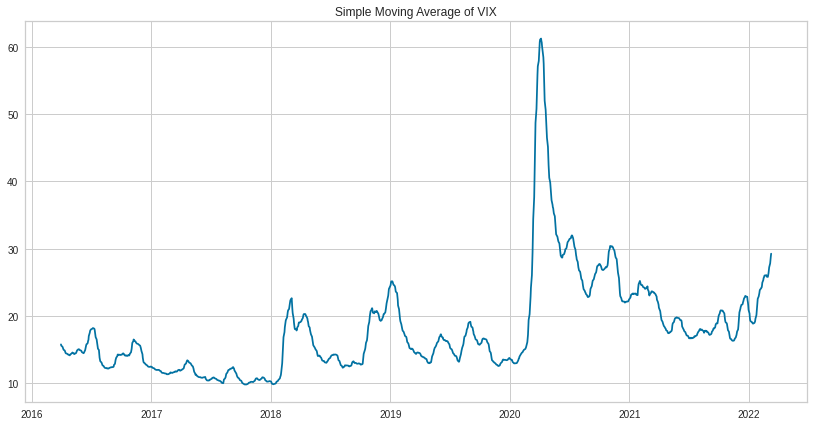

In [179]:
plt.figure(figsize =(14,7))
plt.title('Simple Moving Average of VIX')
plt.plot(df_new['SMA'])

In [180]:
percentiles = [15,20,50,80,85]

In [181]:
ratios =df_new['Ratios'].dropna()
percentile_values =np.percentile(ratios,percentiles)
percentile_values

array([0.87177248, 0.88753983, 0.96955485, 1.09989165, 1.13839692])

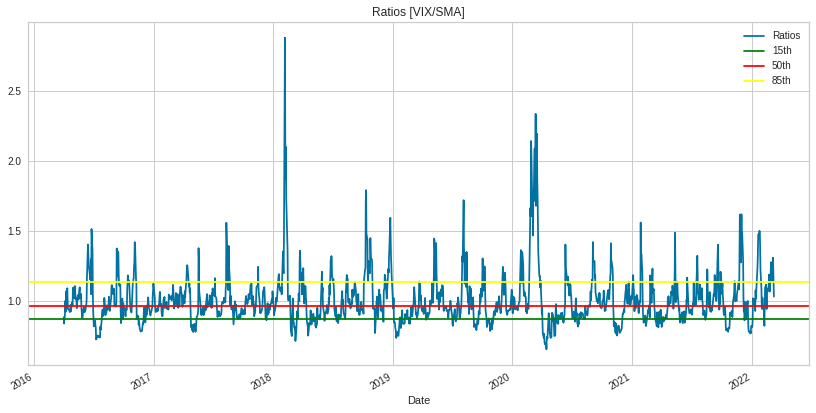

In [182]:
plt.figure(figsize =(14,7))
plt.title('Ratios [VIX/SMA]')
df_new['Ratios'].dropna().plot(legend= True)
plt.axhline(percentile_values[0],c='green',label='15th')
plt.axhline(percentile_values[2],c='red',label='50th')
plt.axhline(percentile_values[-1],c='yellow',label='85th')
plt.legend()
plt.show()

In [183]:
sell = percentile_values[-1]
buy = percentile_values[0]
df_new['positions'] = np.where(df_new.Ratios> sell,-1,np.nan)
df_new['positions'] = np.where(df_new.Ratios< buy,1,df_new['positions'])
df_new['positions']=df_new['positions'].ffill()
df_new['buy']=np.where(df_new.positions==1,df_new['VIX'],np.nan)
df_new['sell']=np.where(df_new.positions==-1,df_new['VIX'],np.nan)

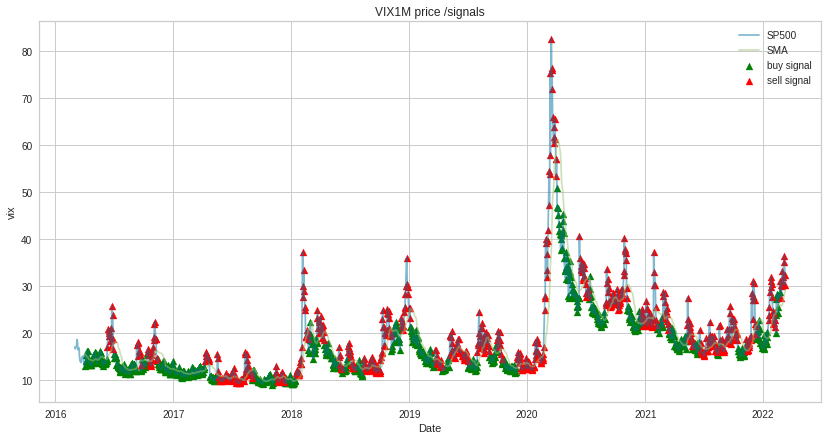

In [184]:
plt.figure(figsize =(14,7))

plt.title('VIX1M price /signals')
plt.plot(df_new['VIX'],alpha=0.5,label='SP500')
plt.plot(df_new['SMA'],alpha=0.5,label='SMA')
plt.scatter(df_new.index,df_new['buy'],color='green',label='buy signal',marker='^',alpha=1)
plt.scatter(df_new.index,df_new['sell'],color='red',label='sell signal',marker='^',alpha=1)
plt.xlabel('Date')
plt.ylabel('vix')
plt.legend()
plt.show()

<Figure size 1440x1008 with 0 Axes>

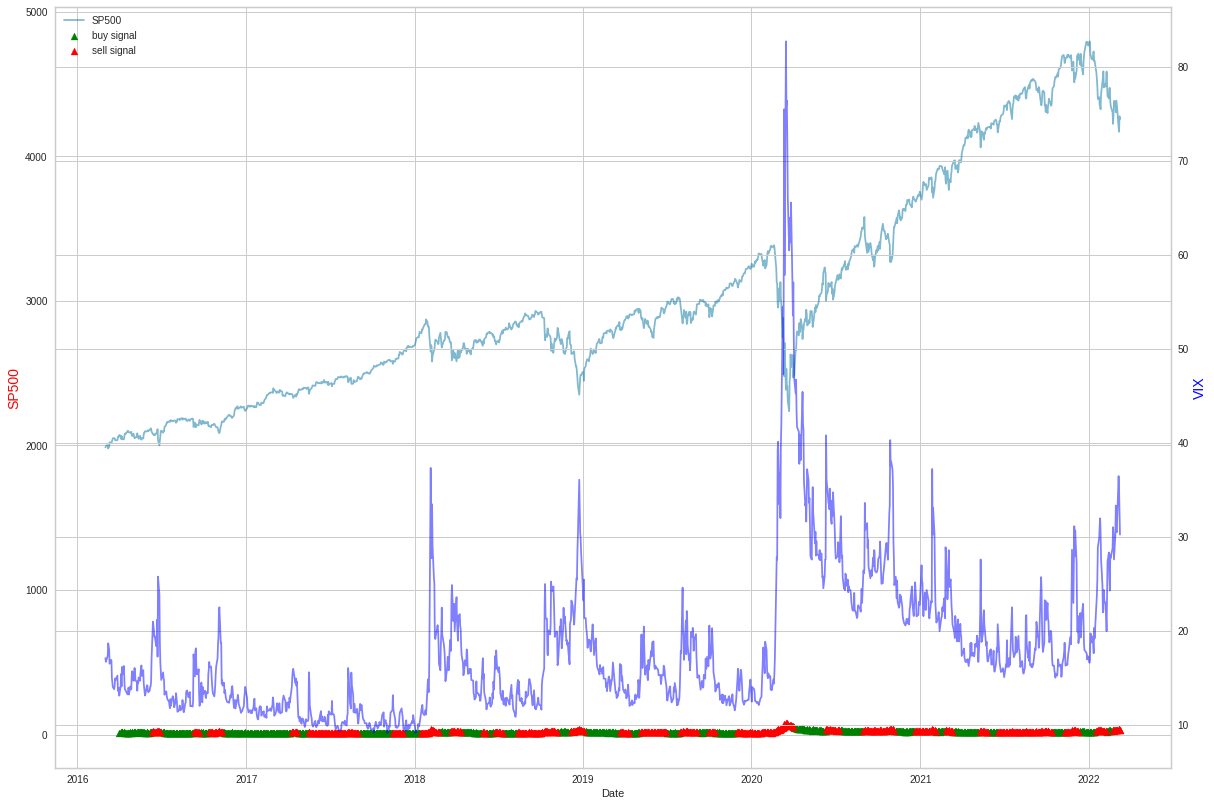

In [185]:
plt.figure(figsize =(20,14))
fig,ax = plt.subplots(figsize =(20,14))
ax.plot(df_new['SPX'],alpha=0.5,label='SP500')
plt.scatter(df_new.index,df_new['buy'],color='green',label='buy signal',marker='^',alpha=1)
plt.scatter(df_new.index,df_new['sell'],color='red',label='sell signal',marker='^',alpha=1)
plt.xlabel('Date')
plt.ylabel('vix')
plt.legend()
# set x-axis label

# set y-axis label
ax.set_ylabel("SP500",
              color="red",
              fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object

ax2.plot(df_new['VIX'],alpha=0.5,label='vix',color='blue')
ax2.set_ylabel("VIX",color="blue",fontsize=14)
plt.show()

In [186]:
df_new['VIX1M_returns']=np.log(df_new['M1'])-np.log(df_new['M1']).shift(1)

In [187]:
df_new['strategy_returns']=df_new.positions.shift(1)*df_new.VIX1M_returns
df_new['strategy_returns']

Date
2016-03-02         NaN
2016-03-03         NaN
2016-03-04         NaN
2016-03-07         NaN
2016-03-08         NaN
                ...   
2022-03-04   -0.073006
2022-03-07   -0.073552
2022-03-08    0.011938
2022-03-09    0.064734
2022-03-10    0.054588
Name: strategy_returns, Length: 1518, dtype: float64

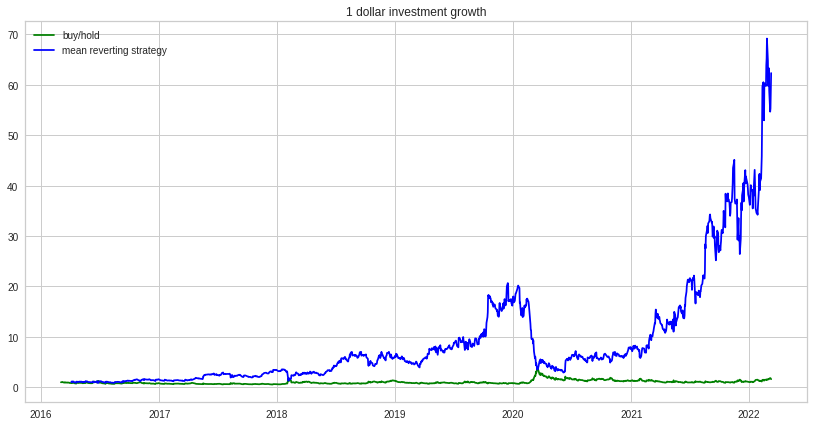

In [188]:
#plot cumalative returns
plt.figure(figsize =(14,7))
plt.title('1 dollar investment growth')
plt.plot(np.exp(df_new['VIX1M_returns'].dropna()).cumprod(),c='green',label='buy/hold')
plt.plot(np.exp(df_new.strategy_returns.dropna()).cumprod(),c='blue',label='mean reverting strategy')
plt.legend()
plt.show()

In [189]:
print('buy hold',np.exp(df_new['VIX1M_returns'].dropna()).cumprod()[-1]-1)
print('strategy',np.exp(df_new['strategy_returns'].dropna()).cumprod()[-1]-1)

buy hold 0.5699481865284961
strategy 61.340036906057485
